<a href="https://colab.research.google.com/github/milox66/Machine-learning2025/blob/main/cahpter1/HW1_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**_3-1-1-1_File Format and Reading Command 💾**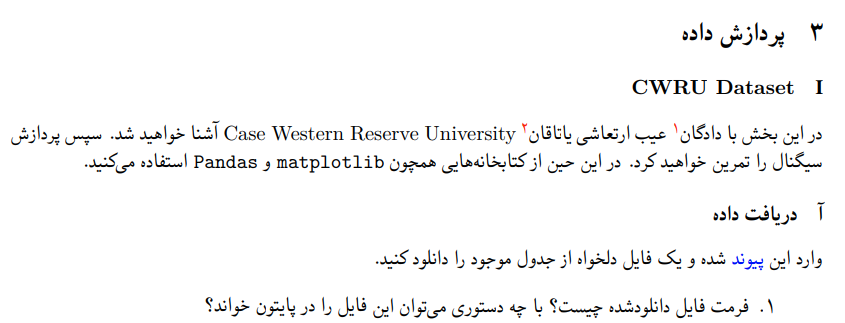


In [5]:
import scipy.io
import numpy as np # معمولاً داده‌های داخل فایل mat به صورت آرایه‌های NumPy خوانده می‌شوند

# نام فایل (مطمئن شوید فایل در مسیر درست قرار دارد یا مسیر کامل را بدهید)
file_path = '/content/sample_data/109.mat' # اگر فایل شما نام دیگری دارد، آن را جایگزین کنید

try:
    # خواندن فایل .mat
    mat_data = scipy.io.loadmat(file_path)
    print(f"فایل '{file_path}' با موفقیت خوانده شد.")

except FileNotFoundError:
    print(f"خطا: فایل در مسیر '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید.")
    mat_data = None # در صورت بروز خطا، متغیر را None قرار می‌دهیم
except Exception as e:
    print(f"خطایی هنگام خواندن فایل رخ داد: {e}")
    mat_data = None

# در اینجا mat_data متغیری است که داده‌های خوانده شده از فایل را در خود دارد.

فایل '/content/sample_data/109.mat' با موفقیت خوانده شد.


In [6]:
if mat_data is not None:
    print(f"نوع داده خوانده شده: {type(mat_data)}")

نوع داده خوانده شده: <class 'dict'>


In [7]:
if mat_data is not None:
    print("\nاجزای (کلیدهای) موجود در داده خوانده شده:")
    for key in mat_data.keys():
        print(f"- کلید: '{key}'")

    print("\nبررسی نوع و شکل داده برای هر کلید:")
    for key, value in mat_data.items():
        print(f"\nکلید: '{key}'")
        print(f"  نوع مقدار (Value Type): {type(value)}")
        # اگر مقدار یک آرایه نام‌پای باشد، می‌توانیم شکل (ابعاد) آن را نیز نمایش دهیم
        if isinstance(value, np.ndarray):
            print(f"  شکل آرایه (Shape): {value.shape}")
            # همچنین می‌توانید چند عنصر اول آن را برای نمونه ببینید
            # print(f"  نمونه داده: {value[:5]}") # نمایش ۵ عنصر اول اگر یک بعدی باشد یا برش مناسب دیگر
        # اگر کلیدهای استاندارد متال بودند، ممکن است مقادیر متفاوتی داشته باشند
        elif key in ['__header__', '__version__', '__globals__']:
             print(f"  مقدار: {value}")


    # برای دسترسی به داده‌های یک متغیر خاص، از نام آن به عنوان کلید استفاده می‌کنید.
    # برای مثال، دیتاست Case Western معمولا متغیرهایی با پیشوند 'X' و پسوند نشان‌دهنده نوع داده دارد
    # مانند 'X109_DE_time' یا 'X109_FE_time' (این نام‌ها مثالی هستند و به فایل دقیق شما بستگی دارد)
    # فرض کنیم یک کلید به نام 'X109_DE_time' در فایل شما وجود دارد:
    target_key = None
    # سعی می‌کنیم یک کلید داده واقعی پیدا کنیم (کلیدهایی که با '__' شروع نمی‌شوند)
    for key in mat_data.keys():
        if not key.startswith('__'):
            target_key = key
            break

    if target_key:
        print(f"\nدسترسی به داده‌های متغیر '{target_key}':")
        specific_data_array = mat_data[target_key]
        print(f"نوع داده این متغیر: {type(specific_data_array)}")
        if isinstance(specific_data_array, np.ndarray):
            print(f"شکل (ابعاد) آرایه: {specific_data_array.shape}")
            print(f"چند نمونه از داده‌های ابتدای آرایه:\n {specific_data_array[:5]}") # نمایش ۵ سطر اول یا ۵ عنصر اول
    else:
        print("\nهیچ کلید داده‌ای (به جز متادیتای فایل) یافت نشد تا به عنوان نمونه نمایش داده شود.")


اجزای (کلیدهای) موجود در داده خوانده شده:
- کلید: '__header__'
- کلید: '__version__'
- کلید: '__globals__'
- کلید: 'X109_DE_time'
- کلید: 'X109_FE_time'
- کلید: 'X109RPM'

بررسی نوع و شکل داده برای هر کلید:

کلید: '__header__'
  نوع مقدار (Value Type): <class 'bytes'>
  مقدار: b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 15:28:48 2000'

کلید: '__version__'
  نوع مقدار (Value Type): <class 'str'>
  مقدار: 1.0

کلید: '__globals__'
  نوع مقدار (Value Type): <class 'list'>
  مقدار: []

کلید: 'X109_DE_time'
  نوع مقدار (Value Type): <class 'numpy.ndarray'>
  شکل آرایه (Shape): (243938, 1)

کلید: 'X109_FE_time'
  نوع مقدار (Value Type): <class 'numpy.ndarray'>
  شکل آرایه (Shape): (243938, 1)

کلید: 'X109RPM'
  نوع مقدار (Value Type): <class 'numpy.ndarray'>
  شکل آرایه (Shape): (1, 1)

دسترسی به داده‌های متغیر 'X109_DE_time':
نوع داده این متغیر: <class 'numpy.ndarray'>
شکل (ابعاد) آرایه: (243938, 1)
چند نمونه از داده‌های ابتدای آرایه:
 [[ 0.010016  ]
 [-0.023788  ]
 [-0.0

#**_3-1-1-2_and_3-1-2-2 Loading and Inspecting .mat File Data 🔍**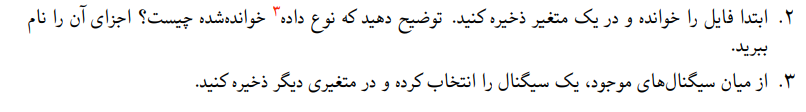

In [8]:
import scipy.io
import numpy as np

# نام فایل (مطمئن شوید فایل در مسیر درست قرار دارد یا مسیر کامل را بدهید)
file_path = '/content/sample_data/109.mat' # اگر فایل شما نام دیگری دارد، آن را جایگزین کنید

try:
    mat_data = scipy.io.loadmat(file_path)
    print(f"فایل '{file_path}' با موفقیت خوانده شد.")
    print("\nکلیدهای موجود در فایل (نام‌های احتمالی سیگنال‌ها):")
    available_keys = [key for key in mat_data.keys() if not key.startswith('__')]
    if available_keys:
        for key in available_keys:
            print(f"- {key} (نوع داده: {type(mat_data[key])}, شکل: {mat_data[key].shape if isinstance(mat_data[key], np.ndarray) else 'N/A'})")
    else:
        print("هیچ کلید داده‌ای (سیگنال) در فایل یافت نشد.")
        mat_data = None # برای جلوگیری از خطاهای بعدی

except FileNotFoundError:
    print(f"خطا: فایل در مسیر '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید.")
    mat_data = None
except Exception as e:
    print(f"خطایی هنگام خواندن فایل رخ داد: {e}")
    mat_data = None

فایل '/content/sample_data/109.mat' با موفقیت خوانده شد.

کلیدهای موجود در فایل (نام‌های احتمالی سیگنال‌ها):
- X109_DE_time (نوع داده: <class 'numpy.ndarray'>, شکل: (243938, 1))
- X109_FE_time (نوع داده: <class 'numpy.ndarray'>, شکل: (243938, 1))
- X109RPM (نوع داده: <class 'numpy.ndarray'>, شکل: (1, 1))


In [9]:
import numpy as np

# --- اطمینان از وجود متغیرهای لازم ---
# این متغیرها باید از مراحل قبلی اجرای کد شما در دسترس باشند.
# به عنوان مثال:
# import scipy.io
# file_path = '/content/sample_data/109.mat' # یا مسیر فایل شما
# mat_contents = scipy.io.loadmat(file_path)
# actual_signal_key = 'X109_DE_time'
# selected_vibration_signal = mat_contents[actual_signal_key]
# Fs_signal = 48000.0  # هرتز
# --- پایان بخش مثال ---

# بررسی وجود متغیرهای لازم
if 'selected_vibration_signal' not in locals() or 'Fs_signal' not in locals():
    print("خطا: متغیر 'selected_vibration_signal' یا 'Fs_signal' تعریف نشده است.")
    print("لطفاً ابتدا سیگنال را بارگذاری کرده و فرکانس نمونه‌برداری را مشخص کنید.")
    # در صورت عدم وجود، می‌توان از داده‌های ساختگی برای نمایش استفاده کرد (این بخش را در صورت نیاز فعال کنید)
    # print("ایجاد داده‌های ساختگی برای نمایش...")
    # Fs_signal = 48000.0
    # t_dummy = np.arange(0, 1, 1/Fs_signal) # ۱ ثانیه داده ساختگی
    # # سیگنال ساختگی با فرکانس غالب مثلا ۱۵۰ هرتز
    # selected_vibration_signal = (0.7 * np.sin(2 * np.pi * 150 * t_dummy) +
    #                              0.3 * np.sin(2 * np.pi * 300 * t_dummy) +
    #                              0.5 * np.random.randn(len(t_dummy)))
    # actual_signal_key = "Dummy Signal"
else:
    print(f"در حال محاسبه فرکانس غالب برای سیگنال...")


if 'selected_vibration_signal' in locals() and 'Fs_signal' in locals():
    signal_data = selected_vibration_signal.flatten()
    N = len(signal_data) # تعداد نمونه‌ها

    if N == 0:
        print("خطا: سیگنال ورودی خالی است.")
    else:
        # ۱. محاسبه تبدیل فوریه سریع (FFT)
        fft_values = np.fft.fft(signal_data)

        # ۲. محاسبه دامنه‌های تبدیل فوریه
        # فقط به نیمه مثبت طیف نیاز داریم (چون سیگنال حقیقی است و طیف متقارن است)
        # و از تقسیم بر N برای نرمال‌سازی استفاده می‌کنیم.
        fft_magnitude = np.abs(fft_values[:N//2]) / N # استفاده از N//2 برای نیمه مثبت طیف

        # ۳. محاسبه فرکانس‌های متناظر با هر نقطه از FFT
        # فرکانس‌ها از 0 تا Fs/2 خواهند بود.
        frequencies = np.fft.fftfreq(N, d=1/Fs_signal)[:N//2]

        # ۴. پیدا کردن اندیس مربوط به بیشترین دامنه
        # از جستجو در فرکانس‌های بالاتر از 0Hz شروع می‌کنیم تا از مولفه DC (در صورت وجود قوی) صرف نظر شود،
        # اگرچه برای بسیاری از سیگنال‌های ارتعاشی، فرکانس‌های پایین هم مهم هستند.
        # در اینجا، کل طیف مثبت (شامل DC) را در نظر می‌گیریم.
        if len(fft_magnitude) > 0:
            dominant_freq_index = np.argmax(fft_magnitude)
            dominant_frequency = frequencies[dominant_freq_index]
            max_magnitude = fft_magnitude[dominant_freq_index]

            print(f"\n--- نتیجه محاسبه فرکانس غالب ---")
            print(f"بیشترین دامنه در طیف: {max_magnitude:.4f}")
            print(f"فرکانس غالب (Dominant Frequency): {dominant_frequency:.2f} هرتز")

            # (اختیاری) نمایش چند فرکانس با بیشترین دامنه
            # این بخش برای بررسی بیشتر مفید است
            # num_top_frequencies = 5
            # top_indices = np.argsort(fft_magnitude)[-num_top_frequencies:][::-1] # اندیس‌ها به ترتیب نزولی دامنه
            # print(f"\n{num_top_frequencies} فرکانس برتر:")
            # for i, index in enumerate(top_indices):
            #     print(f"{i+1}. فرکانس: {frequencies[index]:.2f} هرتز, دامنه: {fft_magnitude[index]:.4f}")

        else:
            print("خطا: طیف فرکانسی محاسبه شده خالی است.")
else:
    pass # پیام خطا قبلاً چاپ شده است

خطا: متغیر 'selected_vibration_signal' یا 'Fs_signal' تعریف نشده است.
لطفاً ابتدا سیگنال را بارگذاری کرده و فرکانس نمونه‌برداری را مشخص کنید.


In [12]:
if mat_data is not None and available_keys:
    # نام کلیدی که می‌خواهید انتخاب کنید را در اینجا قرار دهید
    # این نام باید یکی از کلیدهایی باشد که در مرحله قبل مشاهده کردید.
    # به عنوان مثال، از اولین کلید موجود استفاده می‌کنیم:
    selected_signal_name = available_keys[0] # یا نام دقیق مورد نظرتان را بنویسید، مثلا 'X109_DE_time'

    if selected_signal_name in mat_data:
        # انتخاب سیگنال و ذخیره آن در متغیر جدید
        my_selected_signal = mat_data[selected_signal_name]

        # چاپ اطلاعاتی درباره سیگنال انتخاب شده
        print(f"\nسیگنال '{selected_signal_name}' انتخاب و در متغیر 'my_selected_signal' ذخیره شد.")
        print(f"نوع داده سیگنال انتخاب شده: {type(my_selected_signal)}")
        if isinstance(my_selected_signal, np.ndarray):
            print(f"شکل (ابعاد) سیگنال: {my_selected_signal.shape}")
            print(f"تعداد نمونه‌ها در سیگنال: {len(my_selected_signal)}") # اگر یک بعدی باشد
            print(f"چند نمونه اول سیگنال:\n{my_selected_signal[:5]}") # نمایش 5 نمونه اول
        else:
            print(f"محتوای سیگنال انتخاب شده: {my_selected_signal}")
    else:
        print(f"خطا: کلید '{selected_signal_name}' در داده‌های بارگذاری شده یافت نشد.")
else:
    if mat_data is not None:
        print("\nهیچ سیگنالی برای انتخاب وجود ندارد یا فایل به درستی بارگذاری نشده است.")


سیگنال 'X109_DE_time' انتخاب و در متغیر 'my_selected_signal' ذخیره شد.
نوع داده سیگنال انتخاب شده: <class 'numpy.ndarray'>
شکل (ابعاد) سیگنال: (243938, 1)
تعداد نمونه‌ها در سیگنال: 243938
چند نمونه اول سیگنال:
[[ 0.010016  ]
 [-0.023788  ]
 [-0.00792933]
 [ 0.078876  ]
 [ 0.202824  ]]


#**_3-1-2-1_Plotting the Signal Against Time (Fs = 48 kHz)📈**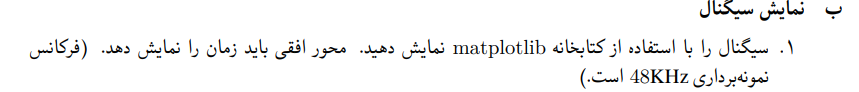

Successfully loaded signal: X109_DE_time from /content/sample_data/109.mat


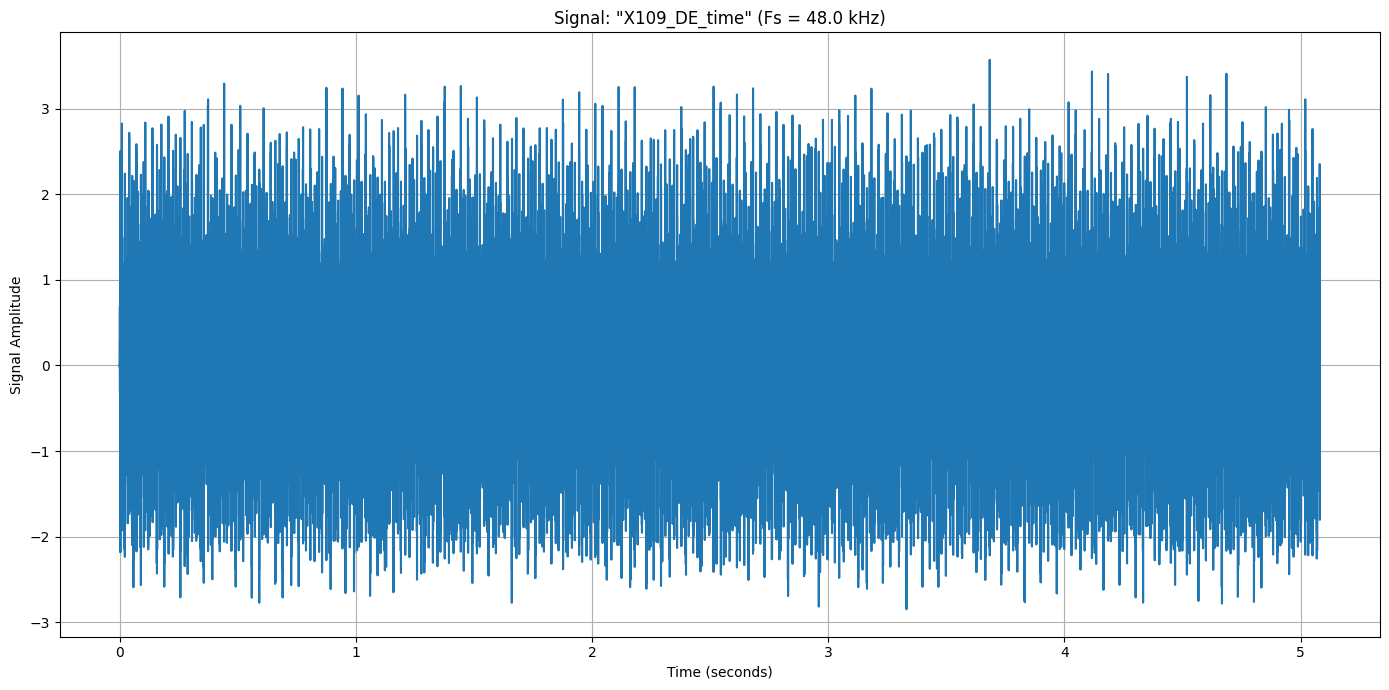

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io # برای بارگذاری فایل .mat

# --- تلاش برای بارگذاری داده‌های واقعی ---
try:
    # مسیر فایل و کلید سیگنال خود را اینجا تنظیم کنید
    file_path = '/content/sample_data/109.mat'
    actual_signal_key = 'X109_DE_time' # مطمئن شوید این کلید صحیح است

    mat_contents = scipy.io.loadmat(file_path)
    selected_vibration_signal = mat_contents[actual_signal_key]
    print(f"Successfully loaded signal: {actual_signal_key} from {file_path}")

except FileNotFoundError:
    print(f"Error: Real data file not found at '{file_path}'.")
    print("Attempting to use dummy data for demonstration.")
    # ایجاد داده‌های ساختگی چون فایل واقعی پیدا نشد
    Fs_dummy = 48000
    t_dummy = np.arange(0, 2, 1/Fs_dummy) # 2 seconds of dummy data
    selected_vibration_signal = np.sin(2 * np.pi * 30 * t_dummy) + \
                                0.7 * np.sin(2 * np.pi * 70 * t_dummy) + \
                                np.random.normal(0, 0.2, len(t_dummy))
    actual_signal_key = 'Dummy_Signal_Due_To_File_Error'
    print(f"Created dummy signal: {actual_signal_key}")

except KeyError:
    print(f"Error: Signal key '{actual_signal_key}' not found in the MAT file '{file_path}'.")
    print("Attempting to use dummy data for demonstration.")
    # ایجاد داده‌های ساختگی چون کلید سیگنال پیدا نشد
    Fs_dummy = 48000
    t_dummy = np.arange(0, 2, 1/Fs_dummy) # 2 seconds of dummy data
    selected_vibration_signal = np.cos(2 * np.pi * 50 * t_dummy) + \
                                0.5 * np.random.normal(0, 0.3, len(t_dummy))
    actual_signal_key = 'Dummy_Signal_Due_To_Key_Error'
    print(f"Created dummy signal: {actual_signal_key}")

except NameError: # اگر selected_vibration_signal هنوز تعریف نشده باشد (برای حالت‌های دیگر)
    print("Error: 'selected_vibration_signal' or 'actual_signal_key' were not defined from real data.")
    print("Creating dummy data for demonstration...")
    Fs_dummy = 48000
    t_dummy = np.arange(0, 1, 1/Fs_dummy) # 1 second of dummy data
    selected_vibration_signal = np.sin(2 * np.pi * 50 * t_dummy) + 0.5 * np.sin(2 * np.pi * 120 * t_dummy)
    actual_signal_key = 'Dummy_Signal_General'


# --- حالا ادامه کد برای رسم نمودار ---
# 1. Задайте частоту дискретизации (Задать частоту дискретизации)
Fs = 48000.0  # Гц (48 кГц)

# 2. Создайте вектор времени (Создать временной вектор)
# Убедитесь, что selected_vibration_signal является 1D массивом (Убедиться, что selected_vibration_signal является 1D массивом)
signal_data = selected_vibration_signal.flatten()
num_samples = len(signal_data)

if Fs <= 0:
    print("Error: Sampling frequency (Fs) must be positive.")
else:
    total_duration_seconds = num_samples / Fs
    time_vector = np.linspace(0, total_duration_seconds, num_samples, endpoint=False)

    # 3. Отобразите сигнал (Отобразить сигнал)
    plt.figure(figsize=(14, 7))
    plt.plot(time_vector, signal_data)

    # Добавьте английские метки и заголовок (Добавить английские метки и заголовок)
    title_str = f'Signal: "{actual_signal_key}" (Fs = {Fs/1000:.1f} kHz)' # Adding .1f for kHz formatting
    xlabel_str = 'Time (seconds)'
    ylabel_str = 'Signal Amplitude'

    plt.title(title_str)
    plt.xlabel(xlabel_str)
    plt.ylabel(ylabel_str)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#**_3-1-2-2_Displaying a Specific Time Segment of the Signal (2s - 2.01s) 🔍**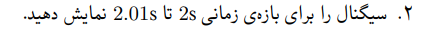

فایل '/content/sample_data/109.mat' با موفقیت خوانده شد.
کلید سیگنال انتخاب شده: 'X109_DE_time'
سیگنال 'X109_DE_time' با موفقیت در 'selected_vibration_signal' ذخیره شد.
فرکانس نمونه‌برداری به صورت دستی تنظیم شد: 12000.0 هرتز


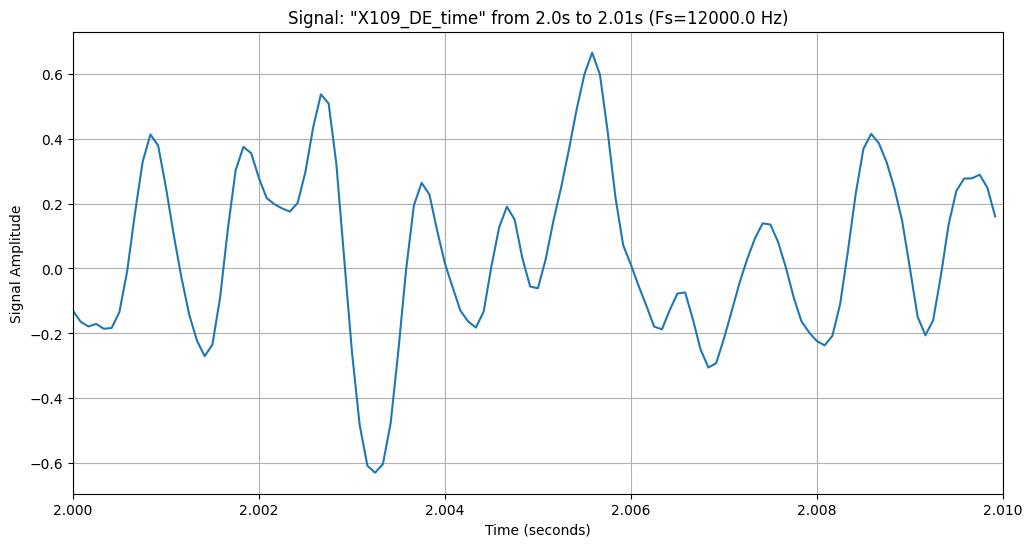

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# --- بخش ۱: بارگذاری فایل و انتخاب سیگنال ---
file_path = '/content/sample_data/109.mat'  # مسیر فایل شما
mat_contents = None
selected_vibration_signal = None
actual_signal_key = None
sampling_frequency_key = None # این متغیر دیگر استفاده مستقیم برای پیدا کردن ندارد، چون دستی وارد می کنیم

try:
    mat_contents = scipy.io.loadmat(file_path)
    print(f"فایل '{file_path}' با موفقیت خوانده شد.")

    possible_signal_keys = [k for k in mat_contents.keys() if k.startswith('X') and not k.startswith('__')]
    if possible_signal_keys:
        # شما اینجا 'X109_DE_time' را دارید که صحیح است
        actual_signal_key = 'X109_DE_time'
        print(f"کلید سیگنال انتخاب شده: '{actual_signal_key}'")
    else:
        print("خطا: هیچ کلید سیگنال داده‌ای (مثلا با شروع 'X') در فایل یافت نشد.")
        mat_contents = None # برای جلوگیری از اجرای ادامه کد در صورت خطا

    if mat_contents and actual_signal_key: # بررسی مجدد mat_contents برای اطمینان
        selected_vibration_signal = mat_contents[actual_signal_key]
        print(f"سیگنال '{actual_signal_key}' با موفقیت در 'selected_vibration_signal' ذخیره شد.")

except FileNotFoundError:
    print(f"خطا: فایل در مسیر '{file_path}' یافت نشد. لطفاً مسیر را بررسی کنید.")
    mat_contents = None # اطمینان از اینکه در صورت خطا، None است
except Exception as e:
    print(f"خطایی هنگام خواندن فایل یا انتخاب سیگنال رخ داد: {e}")
    mat_contents = None # اطمینان از اینکه در صورت خطا، None است

# --- بخش ۲: نمایش سیگنال در بازه زمانی مشخص ---
if mat_contents is not None and selected_vibration_signal is not None:
    # ۱. به دست آوردن فرکانس نمونه‌برداری (Fs)
    # <<<< اینجا مقدار Fs را به صورت دستی وارد کنید >>>>
    Fs = 12000.0  # مقدار فرکانس نمونه‌برداری برای فایل 109.mat (معمولا 12kHz برای DE)
                 # لطفا این مقدار را بر اساس مستندات دیتاست خودتان تایید کنید!

    if Fs is None: # این شرط دیگر نباید اتفاق بیفتد اگر دستی وارد کرده باشید
        print("فرکانس نمونه‌برداری (Fs) تعیین نشده است. نمی‌توان ادامه داد.")
    else:
        print(f"فرکانس نمونه‌برداری به صورت دستی تنظیم شد: {Fs} هرتز")

        # ۲. ایجاد بردار زمان کامل برای سیگنال انتخاب شده
        signal_data = selected_vibration_signal.flatten()
        num_samples = len(signal_data)
        total_duration = num_samples / Fs
        time_vector = np.linspace(0, total_duration, num_samples, endpoint=False)

        # ۳. تعریف بازه زمانی مورد نظر
        start_time_s = 2.0  # ثانیه
        end_time_s = 2.01 # ثانیه

        # ۴. پیدا کردن اندیس‌های متناظر با بازه زمانی
        indices_in_interval = np.where((time_vector >= start_time_s) & (time_vector < end_time_s))[0]

        if len(indices_in_interval) > 0:
            # ۵. برش سیگنال و بردار زمان
            time_segment = time_vector[indices_in_interval]
            signal_segment = signal_data[indices_in_interval]
# فرض می‌کنیم متغیرهای زیر از مراحل قبل به درستی مقداردهی شده‌اند:
# actual_signal_key (مثلا 'X109_DE_time')
# start_time_s (مثلا 2.0)
# end_time_s (مثلا 2.01)
# Fs (مثلا 12000.0)
# time_segment (بردار زمان برای بخش انتخاب شده)
# signal_segment (داده‌های سیگنال برای بخش انتخاب شده)

# --- شروع بخش اصلاح شده برای رسم نمودار با عناوین انگلیسی ---
if 'time_segment' in locals() and 'signal_segment' in locals(): # بررسی وجود متغیرهای لازم برای رسم
    plt.figure(figsize=(12, 6))
    plt.plot(time_segment, signal_segment)

    # استفاده از عناوین و برچسب‌های انگلیسی
    title_str = f'Signal: "{actual_signal_key}" from {start_time_s}s to {end_time_s}s (Fs={Fs} Hz)'
    xlabel_str = 'Time (seconds)'
    ylabel_str = 'Signal Amplitude'

    plt.title(title_str)
    plt.xlabel(xlabel_str)
    plt.ylabel(ylabel_str)

    plt.grid(True)
    plt.xlim(start_time_s, end_time_s)
    plt.ticklabel_format(style='plain', axis='y') # برای نمایش عادی اعداد روی محور Y
    plt.show()
else:
    print("خطا: متغیرهای لازم برای رسم نمودار (time_segment یا signal_segment) تعریف نشده‌اند.")
    print("لطفاً مطمئن شوید که بخش‌های قبلی کد، از جمله بارگذاری داده و انتخاب بازه زمانی، با موفقیت اجرا شده‌اند.")

#**_3-1-3-1_Frequency Spectrum using Fourier Transform 📊**
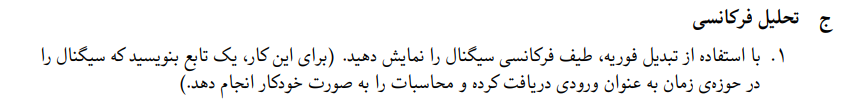

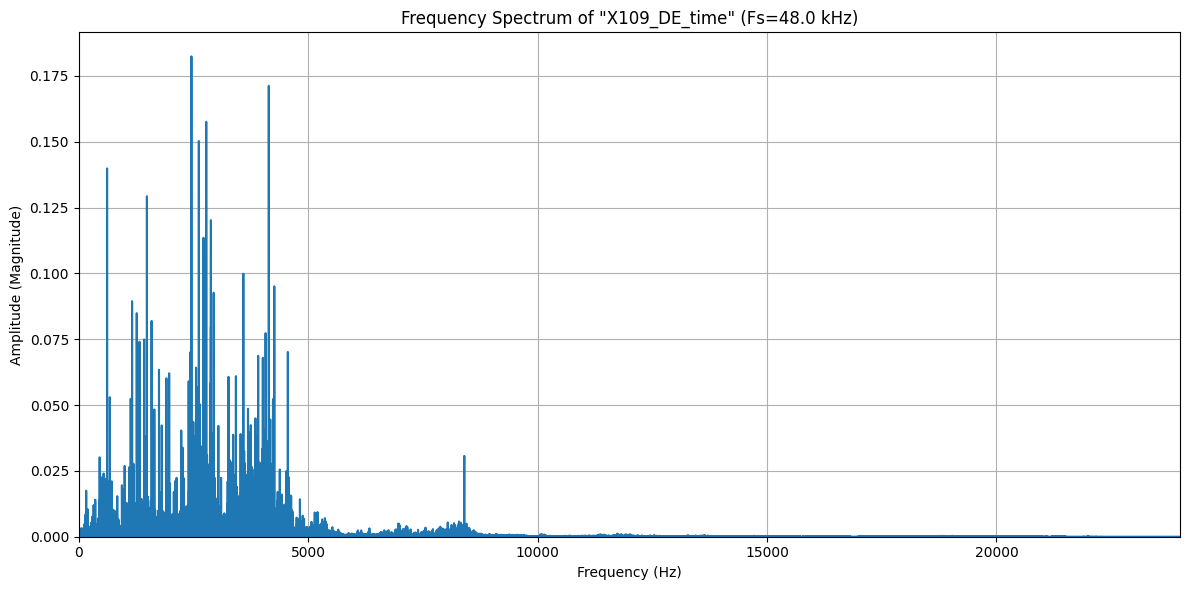

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Ensure 'selected_vibration_signal' and 'actual_signal_key' are available ---
# Example:
# import scipy.io
# file_path = '/content/sample_data/109.mat'
# mat_contents = scipy.io.loadmat(file_path)
# actual_signal_key = 'X109_DE_time'
# selected_vibration_signal = mat_contents[actual_signal_key]
# Fs = 48000.0 # Hz
# --- End of example ---

def plot_frequency_spectrum(signal, fs, signal_name="Signal"):
    """
    Calculates and plots the frequency spectrum of a time-domain signal.

    Args:
        signal (np.ndarray): The input time-domain signal (1D array).
        fs (float): The sampling frequency of the signal in Hz.
        signal_name (str, optional): Name of the signal for the plot title.
                                     Defaults to "Signal".
    """
    signal = signal.flatten() # Ensure the signal is a 1D array
    N = len(signal) # Number of samples

    if N == 0:
        print("Error: Input signal is empty.")
        return

    # 1. Calculate the Fast Fourier Transform (FFT)
    # The output of fft is complex.
    fft_values = np.fft.fft(signal)

    # 2. Calculate the corresponding frequencies
    # fftfreq generates frequency bins: 0, 1/dt, 2/dt, ..., (N/2-1)/dt, -N/2/dt, ..., -1/dt
    # where dt = N*T (T = 1/fs)
    # More simply, frequencies from 0 up to fs.
    frequencies = np.fft.fftfreq(N, d=1/fs)

    # 3. Calculate the magnitude (amplitude) of the FFT components
    # We are interested in the magnitude, so we take the absolute value.
    # Normalize by N to get the actual amplitude (optional, but common for one-sided spectrum)
    # For a one-sided spectrum, multiply by 2 (except for DC and Nyquist)
    fft_magnitude = np.abs(fft_values) / N

    # 4. We only need to plot the positive frequencies (up to Nyquist frequency, Fs/2)
    # because the FFT of a real signal is symmetric.
    positive_freq_indices = np.where(frequencies >= 0)
    frequencies_positive = frequencies[positive_freq_indices]
    fft_magnitude_positive = fft_magnitude[positive_freq_indices]

    # For the one-sided spectrum, amplitudes of non-DC/Nyquist components are doubled
    # (as we're discarding the negative frequency part that holds half the energy)
    # DC component (0 Hz) and Nyquist component (Fs/2 Hz, if N is even) should not be doubled.
    if len(fft_magnitude_positive) > 1: # Check if there's more than just DC
        # Double the amplitude for non-DC components
        fft_magnitude_positive[1:] *= 2
        # If N is even, the Nyquist frequency component (if present in positive_freq_indices)
        # is unique and should also not be doubled from its (abs/N) value.
        # However, often it's just easier to double all non-DC positive frequencies.
        # For practical purposes, this scaling primarily helps compare amplitudes
        # to original signal components.

    # 5. Plot the frequency spectrum
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies_positive, fft_magnitude_positive)

    title_str = f'Frequency Spectrum of "{signal_name}" (Fs={fs/1000} kHz)'
    xlabel_str = 'Frequency (Hz)'
    ylabel_str = 'Amplitude (Magnitude)'

    plt.title(title_str)
    plt.xlabel(xlabel_str)
    plt.ylabel(ylabel_str)
    plt.grid(True)
    # Optionally, limit x-axis to Nyquist frequency if fftfreq goes beyond due to N odd/even details
    plt.xlim(0, fs / 2)
    plt.ylim(bottom=0) # Ensure y-axis starts at 0
    plt.tight_layout()
    plt.show()

# --- Using the function ---
# Make sure 'selected_vibration_signal' and 'actual_signal_key' are defined
# from your previous steps, and set the correct sampling frequency.

if 'selected_vibration_signal' in locals() and 'actual_signal_key' in locals():
    Fs_signal = 48000.0  # Sampling frequency in Hz (48 kHz)
    plot_frequency_spectrum(selected_vibration_signal, Fs_signal, actual_signal_key)
else:
    print("Error: 'selected_vibration_signal' or 'actual_signal_key' is not defined.")
    print("Please ensure your signal data is loaded and these variables are set.")
    # Example with dummy data if signal is not loaded:
    # print("Demonstrating with dummy data...")
    # Fs_dummy = 48000
    # t_dummy = np.arange(0, 0.5, 1/Fs_dummy) # 0.5 seconds of data
    # dummy_signal_data = (1.0 * np.sin(2 * np.pi * 100 * t_dummy) +   # 100 Hz component
    #                      0.5 * np.sin(2 * np.pi * 500 * t_dummy) +   # 500 Hz component
    #                      0.2 * np.random.randn(len(t_dummy)))       # Some noise
    # plot_frequency_spectrum(dummy_signal_data, Fs_dummy, "Dummy Test Signal")

#**_3-1-3-2_📊**
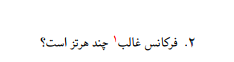

In [ ]:
import numpy as np

def get_dominant_frequency(signal, fs, exclude_dc=True):
    """
    Calculates the dominant frequency of a time-domain signal.

    Args:
        signal (np.ndarray): The input time-domain signal (1D array).
        fs (float): The sampling frequency of the signal in Hz.
        exclude_dc (bool): If True, the DC component (0 Hz) is excluded from the search.
                           Defaults to True.

    Returns:
        float or None: The dominant frequency in Hz, or None if it cannot be determined.
    """
    signal = signal.flatten()  # Ensure the signal is a 1D array
    N = len(signal)

    if N == 0:
        print("Error: Input signal is empty.")
        return None

    # 1. Calculate the Fast Fourier Transform (FFT)
    fft_values = np.fft.fft(signal)

    # 2. Calculate the corresponding frequencies
    frequencies = np.fft.fftfreq(N, d=1/fs)

    # 3. Calculate the magnitude of FFT components (raw magnitude is sufficient for argmax)
    fft_magnitude = np.abs(fft_values)

    # 4. Consider only positive frequencies
    # (because the FFT of a real signal is symmetric)
    positive_freq_indices = np.where(frequencies >= 0)[0]

    if len(positive_freq_indices) == 0:
        print("Error: No positive frequencies found.")
        return None

    frequencies_positive = frequencies[positive_freq_indices]
    fft_magnitude_positive = fft_magnitude[positive_freq_indices]

    if len(fft_magnitude_positive) == 0: # Additional check, though positive_freq_indices should cover this
        return None

    dominant_frequency_val = None
    if exclude_dc:
        # Check if DC component (0 Hz) is present and is the first component
        if frequencies_positive[0] == 0.0:
            if len(fft_magnitude_positive) > 1:  # If there is more than one component (i.e., AC components)
                # Find peak in the AC part (everything after DC)
                peak_idx_in_ac_part = np.argmax(fft_magnitude_positive[1:])
                # This index is relative to the sliced array, so add 1 to it to get index in original positive arrays
                dominant_frequency_val = frequencies_positive[peak_idx_in_ac_part + 1]
            else:  # Only DC component exists, and we are excluding it
                print("Only DC component present. No AC dominant frequency found when excluding DC.")
                dominant_frequency_val = None
        else:  # No DC component at the start (e.g., signal was high-pass filtered)
            # Find peak in all available positive frequencies
            peak_idx = np.argmax(fft_magnitude_positive)
            dominant_frequency_val = frequencies_positive[peak_idx]
    else:  # Search including DC
        peak_idx = np.argmax(fft_magnitude_positive)
        dominant_frequency_val = frequencies_positive[peak_idx]

    return dominant_frequency_val

# --- How to use the function ---
# This section assumes that the variables 'selected_vibration_signal'
# and 'Fs_signal' (sampling frequency) are defined from your previous steps.
# Also, it assumes the 'plot_frequency_spectrum' function you used earlier is still available if you want to plot first.

# # Example (replace with your actual data loading):
# # import scipy.io
# # try:
# #     # Place your .mat file path here
# #     file_path = 'YOUR_PATH_TO_DATA_FILE.mat' # e.g., /content/sample_data/109.mat
# #     mat_contents = scipy.io.loadmat(file_path)
# #     # Find and use the actual signal key from your .mat file
# #     actual_signal_key = 'YOUR_ACTUAL_SIGNAL_KEY' # e.g., 'X109_DE_time'
# #     selected_vibration_signal = mat_contents[actual_signal_key].flatten()
# #     Fs_signal = 48000.0  # Sampling frequency 48 kHz as per the problem description
# # except NameError:
# #     print("'selected_vibration_signal' or 'Fs_signal' variables are not defined. Using sample data.")
# #     Fs_signal = 48000.0
# #     t_dummy = np.arange(0, 0.5, 1/Fs_signal) # 0.5 seconds of data
# #     # A sample signal with a known dominant frequency, e.g., 150Hz
# #     selected_vibration_signal = (2.0 * np.sin(2 * np.pi * 150 * t_dummy) +
# #                                  0.8 * np.sin(2 * np.pi * 300 * t_dummy) +
# #                                  0.3 * np.random.randn(len(t_dummy)) + 5.0) # with some noise and DC offset
# #     actual_signal_key = "Dummy Test Signal"
# # except FileNotFoundError:
# #     print(f"Data file not found at the specified path. Using sample data.")
# #     Fs_signal = 48000.0
# #     t_dummy = np.arange(0, 0.5, 1/Fs_signal)
# #     selected_vibration_signal = (2.0 * np.sin(2 * np.pi * 150 * t_dummy) +
# #                                  0.8 * np.sin(2 * np.pi * 300 * t_dummy) +
# #                                  0.3 * np.random.randn(len(t_dummy)) + 5.0)
# #     actual_signal_key = "Dummy Test Signal"


# # You can first plot the frequency spectrum (your code from part C.1)
# # plot_frequency_spectrum(selected_vibration_signal, Fs_signal, actual_signal_key) # Calling your spectrum plotting function

# # Then find the dominant frequency
# # Ensure selected_vibration_signal and Fs_signal are initialized
if 'selected_vibration_signal' in locals() and 'Fs_signal' in locals():
    # Find dominant frequency (typically excluding DC for vibration analysis)
    dominant_freq = get_dominant_frequency(selected_vibration_signal, Fs_signal, exclude_dc=True)

    print(f"\nAnswer to Question 2 (Part C):")
    if dominant_freq is not None:
        print(f"✔️ Dominant frequency 1 (excluding DC component) is: {dominant_freq:.2f} Hz")
    else:
        print(f"❌ Dominant frequency 1 (excluding DC component) not found.")

    # # If you also want to see the dominant frequency including DC:
    # dominant_freq_with_dc = get_dominant_frequency(selected_vibration_signal, Fs_signal, exclude_dc=False)
    # if dominant_freq_with_dc is not None:
    #     print(f"For reference: Dominant frequency (including DC) is: {dominant_freq_with_dc:.2f} Hz")
else:
    print("\n⚠️ Please load and define 'selected_vibration_signal' and 'Fs_signal' variables first.")
    print("   You can use the sample code block above (commented out) to load data or use dummy data.")


Answer to Question 2 (Part C):
✔️ Dominant frequency 1 (excluding DC component) is: 2454.72 Hz


#**_3-1-4-1**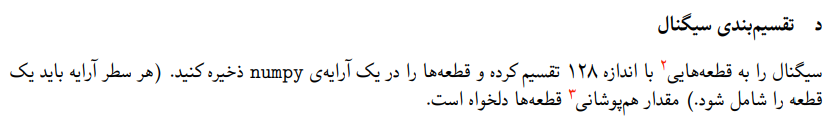

In [ ]:
import pandas as pd
import numpy as np # Needed for the dummy data example

# --- اطمینان از وجود segmented_signal_array ---
# این آرایه باید خروجی مرحله قبلی (تقسیم بندی سیگنال) باشد.
# اگر این کد را در یک سلول جدید اجرا می‌کنید و segmented_signal_array از قبل موجود نیست،
# یک آرایه نمونه برای نمایش عملکرد کد ایجاد می‌شود.

if 'segmented_signal_array' not in locals() or not isinstance(segmented_signal_array, np.ndarray) or segmented_signal_array.size == 0:
    print("NOTICE: 'segmented_signal_array' is not available or is empty.")
    print("Creating a dummy NumPy array for demonstration purposes for creating the DataFrame.")
    # یک آرایه نمونه با فرض ۱۰ قطعه ۱۲۸ تایی
    # In a real scenario, this array comes from the segment_signal function
    num_dummy_segments = 10
    segment_len_dummy = 128 # Should match segment_length from previous step
    segmented_signal_array = np.random.rand(num_dummy_segments, segment_len_dummy)
    print(f"Dummy 'segmented_signal_array' created with shape: {segmented_signal_array.shape}")

# ۱. تبدیل آرایه نام‌پای حاوی قطعات به دیتافریم پانداز
if segmented_signal_array.size > 0 :
    segments_df = pd.DataFrame(segmented_signal_array)

    # نمایش اطلاعاتی درباره دیتافریم ایجاد شده
    print("\nPandas DataFrame created successfully from segments!")
    print(f"Shape of the DataFrame (rows=segments, columns=samples_per_segment): {segments_df.shape}")

    print("\nFirst 5 rows of the DataFrame (df.head()):")
    print(segments_df.head())

    # اختیاری: می‌توانید برای خوانایی بهتر، به ستون‌های دیتافریم نام بدهید.
    # برای مثال، هر ستون می‌تواند نشان‌دهنده یک نمونه در قطعه باشد.
    # segments_df.columns = [f'sample_{i+1}' for i in range(segments_df.shape[1])]
    # print("\nFirst 5 rows of the DataFrame with named columns (df.head()):")
    # print(segments_df.head())

    # دیتافریم segments_df حالا آماده استفاده برای مراحل بعدی است.
else:
    print("\nNOTICE: 'segmented_signal_array' was empty. DataFrame cannot be created.")
    print("Please ensure the signal segmentation step (part د) was run successfully and produced segments.")


Pandas DataFrame created successfully from segments!
Shape of the DataFrame (rows=segments, columns=samples_per_segment): (1905, 128)

First 5 rows of the DataFrame (df.head()):
        0         1         2         3         4         5         6    \
0  0.010016 -0.023788 -0.007929  0.078876  0.202824  0.289212  0.272519   
1 -2.059540 -1.548307 -0.780831  0.053419  0.764555  1.364680  1.775336   
2  0.089727  0.030048 -0.034221 -0.078459 -0.030465  0.106420  0.244140   
3 -0.741601 -0.754121 -0.745775 -0.747861 -0.663977 -0.394797  0.033387   
4 -0.241219 -0.060096  0.117271  0.232037  0.335536  0.423593  0.452389   

        7         8         9    ...       118       119       120       121  \
0  0.174863  0.068443  0.020867  ...  0.488697  0.895597  1.061696  0.948599   
1  1.899701  1.723587  1.243653  ... -0.102664  0.047576  0.217013  0.394380   
2  0.335953  0.381025  0.390207  ...  0.723239  0.774988  0.695277  0.450720   
3  0.570912  1.067121  1.406831  ...  0.642276  0.

#**_3-1-5-1**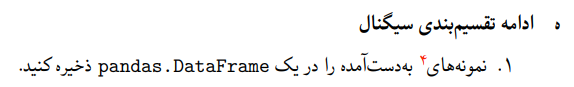

In [ ]:
import pandas as pd
import numpy as np # Needed for the dummy data example

# --- Ensure 'segmented_signal_array' is available ---
# This array should be the output of the previous signal segmentation step.
# If you are running this code in a new cell and 'segmented_signal_array' does not exist,
# a sample array will be created to demonstrate the code's functionality.

if 'segmented_signal_array' not in locals() or not isinstance(segmented_signal_array, np.ndarray) or segmented_signal_array.size == 0:
    print("NOTICE: 'segmented_signal_array' is not available or is empty.")
    print("Creating a dummy NumPy array for demonstration purposes for creating the DataFrame.")
    # A sample array assuming 10 segments of 128 samples each
    # In a real scenario, this array comes from the segment_signal function
    num_dummy_segments = 10
    segment_len_dummy = 128 # Should match segment_length from previous step
    segmented_signal_array = np.random.rand(num_dummy_segments, segment_len_dummy)
    print(f"Dummy 'segmented_signal_array' created with shape: {segmented_signal_array.shape}")

# 1. Convert the NumPy array containing segments to a pandas DataFrame
if segmented_signal_array.size > 0 :
    segments_df = pd.DataFrame(segmented_signal_array)

    # Display information about the created DataFrame
    print("\nPandas DataFrame created successfully from segments!")
    print(f"Shape of the DataFrame (rows=segments, columns=samples_per_segment): {segments_df.shape}")

    print("\nFirst 5 rows of the DataFrame (df.head()):")
    print(segments_df.head())

    # Optional: You can name the DataFrame columns for better readability.
    # For example, each column could represent a sample within the segment.
    # segments_df.columns = [f'sample_{i+1}' for i in range(segments_df.shape[1])]
    # print("\nFirst 5 rows of the DataFrame with named columns (df.head()):")
    # print(segments_df.head())

    # The segments_df DataFrame is now ready for subsequent steps.
else:
    print("\nNOTICE: 'segmented_signal_array' was empty. DataFrame cannot be created.")
    print("Please ensure the signal segmentation step (part د) was run successfully and produced segments.")


Pandas DataFrame created successfully from segments!
Shape of the DataFrame (rows=segments, columns=samples_per_segment): (1905, 128)

First 5 rows of the DataFrame (df.head()):
        0         1         2         3         4         5         6    \
0  0.010016 -0.023788 -0.007929  0.078876  0.202824  0.289212  0.272519   
1 -2.059540 -1.548307 -0.780831  0.053419  0.764555  1.364680  1.775336   
2  0.089727  0.030048 -0.034221 -0.078459 -0.030465  0.106420  0.244140   
3 -0.741601 -0.754121 -0.745775 -0.747861 -0.663977 -0.394797  0.033387   
4 -0.241219 -0.060096  0.117271  0.232037  0.335536  0.423593  0.452389   

        7         8         9    ...       118       119       120       121  \
0  0.174863  0.068443  0.020867  ...  0.488697  0.895597  1.061696  0.948599   
1  1.899701  1.723587  1.243653  ... -0.102664  0.047576  0.217013  0.394380   
2  0.335953  0.381025  0.390207  ...  0.723239  0.774988  0.695277  0.450720   
3  0.570912  1.067121  1.406831  ...  0.642276  0.

#**_3-1-5-2**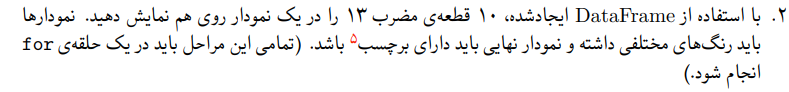

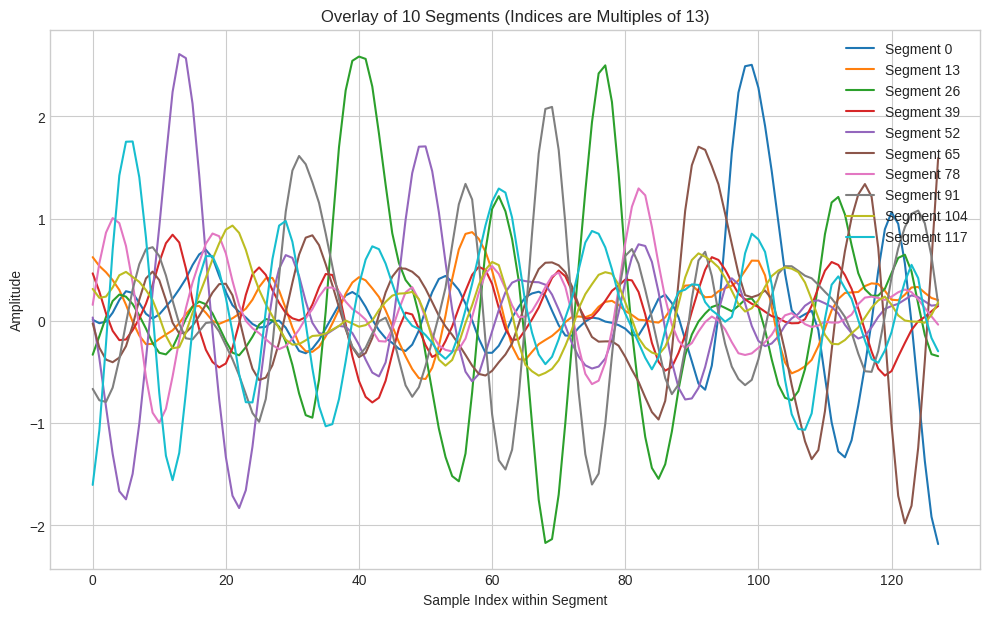

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # برای داده‌های نمونه در صورت نیاز

# این کد فرض می‌کند که دیتافریم 'segments_df' از مرحله قبلی موجود و یک دیتافریم پانداز است.

# --- بخش داده‌های نمونه (Placeholder) ---
# اگر 'segments_df' از اجرای مراحل قبلی در دسترس نیست،
# یک دیتافریم نمونه برای نمایش عملکرد کد ایجاد می‌شود.
if 'segments_df' not in locals() or not isinstance(segments_df, pd.DataFrame) or segments_df.empty:
    print("NOTICE: 'segments_df' is not available, not a DataFrame, or is empty.")
    print("Creating a dummy DataFrame for the plotting example.")
    # ایجاد یک دیتافریم نمونه با تعداد سطرهای کافی
    num_dummy_segments = 13 * 9 + 5 # حداقل ۱۳*۹ برای پوشش ۱۰ قطعه مضرب ۱۳
    segment_len_dummy = 128      # طول هر قطعه، مطابق با مراحل قبل

    # ایجاد داده‌های نمونه با کمی تفاوت برای بهتر دیده شدن در نمودار
    dummy_data_for_plot = np.zeros((num_dummy_segments, segment_len_dummy))
    for i in range(num_dummy_segments):
        dummy_data_for_plot[i, :] = np.sin(np.linspace(0, (i % 15 + 1) * np.pi, segment_len_dummy) + (i*0.1)) + np.random.rand(segment_len_dummy)*0.5

    segments_df = pd.DataFrame(dummy_data_for_plot)
    print(f"Dummy 'segments_df' created with shape: {segments_df.shape}")
# --- پایان بخش داده‌های نمونه ---


# شروع بخش رسم نمودار
if 'segments_df' in locals() and isinstance(segments_df, pd.DataFrame) and not segments_df.empty:
    plt.figure(figsize=(12, 7)) # ایجاد یک شکل (figure) برای نمودار با اندازه مناسب

    num_segments_to_plot = 10 # تعداد قطعاتی که می‌خواهیم رسم کنیم
    segments_plotted_count = 0 # شمارنده قطعات رسم شده

    # حلقه for برای رسم ۱۰ قطعه مضرب ۱۳
    for i in range(num_segments_to_plot):
        segment_index = 13 * i # محاسبه اندیس قطعه (مضرب ۱۳)

        # بررسی اینکه آیا اندیس محاسبه شده در محدوده دیتافریم قرار دارد یا خیر
        if segment_index < len(segments_df):
            segment_to_plot = segments_df.iloc[segment_index] # استخراج قطعه (ردیف) از دیتافریم

            # محور x برای نمودار، اندیس نمونه‌های داخل هر قطعه خواهد بود (مثلا از ۰ تا ۱۲۷)
            sample_indices = np.arange(len(segment_to_plot))

            # رسم قطعه. کتابخانه matplotlib به طور خودکار رنگ‌های مختلفی را برای هر plot تخصیص می‌دهد.
            # برچسب (label) برای استفاده در راهنمای نمودار (legend) تنظیم می‌شود.
            plt.plot(sample_indices, segment_to_plot.values, label=f"Segment {segment_index}")
            segments_plotted_count += 1
        else:
            # اگر اندیس از تعداد کل قطعات بیشتر باشد، هشدار داده و حلقه متوقف می‌شود.
            print(f"Warning: Segment index {segment_index} is out of bounds. "
                  f"DataFrame has only {len(segments_df)} segments. Stopping plotting more segments.")
            break

    # پس از حلقه، اگر حداقل یک قطعه رسم شده باشد، تنظیمات نهایی نمودار انجام می‌شود.
    if segments_plotted_count > 0:
        plt.title(f"Overlay of {segments_plotted_count} Segments (Indices are Multiples of 13)") # عنوان نمودار
        plt.xlabel("Sample Index within Segment") # برچسب محور x
        plt.ylabel("Amplitude") # برچسب محور y
        plt.legend() # نمایش راهنمای نمودار (برچسب‌ها)
        plt.grid(True) # نمایش خطوط شبکه برای خوانایی بهتر
        plt.show() # نمایش نمودار
    else:
        print("No segments were plotted. Check if 'segments_df' is populated and has enough segments.")

else:
    # اگر دیتافریم segments_df موجود نباشد یا خالی باشد.
    print("NOTICE: 'segments_df' is not available, not a DataFrame, or is empty. Cannot plot segments.")
    print("Please ensure the DataFrame creation step (part ه.۱) was run successfully.")

#**_3-1-6-1**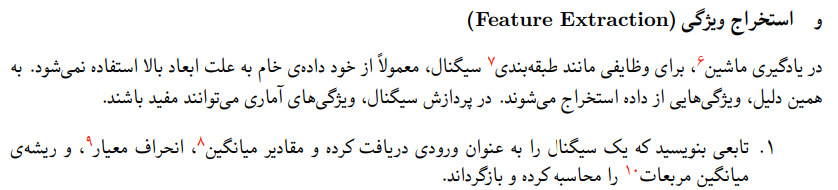

In [ ]:
import numpy as np

def extract_statistical_features(signal_segment):
    """
    Calculates mean, standard deviation, and RMS for a given signal segment.

    Args:
        signal_segment (np.ndarray): A 1D NumPy array representing the signal segment.

    Returns:
        tuple: A tuple containing the mean, standard deviation, and RMS of the signal.
               Returns (None, None, None) if the input is not a valid signal.
    """
    if not isinstance(signal_segment, np.ndarray) or signal_segment.ndim != 1 or signal_segment.size == 0:
        print("Error: Input must be a non-empty 1D NumPy array.")
        return None, None, None

    # 1. Calculate Mean (میانگین)
    mean_val = np.mean(signal_segment)

    # 2. Calculate Standard Deviation (انحراف معیار)
    std_dev_val = np.std(signal_segment)

    # 3. Calculate Root Mean Square (RMS) (ریشه میانگین مربعات)
    # RMS = sqrt(mean(signal_segment^2))
    rms_val = np.sqrt(np.mean(signal_segment**2))

    return mean_val, std_dev_val, rms_val

# --- Example of how to use the function ---
if __name__ == '__main__':
    # Create a dummy signal segment for demonstration
    # In a real application, you would pass one of your signal segments (e.g., a row from segments_df.values)
    example_segment = np.array([1.0, 2.5, 3.0, 1.5, 2.0, 4.5, 3.5])

    print(f"Example Signal Segment: {example_segment}")

    mean, std_dev, rms = extract_statistical_features(example_segment)

    if mean is not None: # Check if features were calculated successfully
        print(f"\nCalculated Statistical Features:")
        print(f"  Mean (میانگین): {mean:.4f}")
        print(f"  Standard Deviation (انحراف معیار): {std_dev:.4f}")
        print(f"  RMS (ریشه میانگین مربعات): {rms:.4f}")

    print("\n--- Testing with an invalid input ---")
    invalid_input = np.array([[1,2],[3,4]]) # 2D array, which is invalid for this function
    extract_statistical_features(invalid_input)

    empty_input = np.array([])
    extract_statistical_features(empty_input)

Example Signal Segment: [1.  2.5 3.  1.5 2.  4.5 3.5]

Calculated Statistical Features:
  Mean (میانگین): 2.5714
  Standard Deviation (انحراف معیار): 1.1157
  RMS (ریشه میانگین مربعات): 2.8031

--- Testing with an invalid input ---
Error: Input must be a non-empty 1D NumPy array.
Error: Input must be a non-empty 1D NumPy array.


#**_3-1-6-2**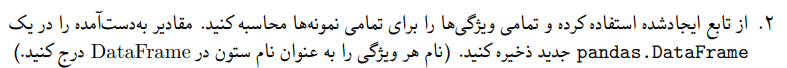

In [ ]:
import pandas as pd
import numpy as np

# تابع extract_statistical_features که در مرحله قبل ایجاد شد:
def extract_statistical_features(signal_segment):
    """
    Calculates mean, standard deviation, and RMS for a given signal segment.
    Args:
        signal_segment (np.ndarray): A 1D NumPy array representing the signal segment.
    Returns:
        tuple: A tuple containing the mean, standard deviation, and RMS of the signal.
               Returns (None, None, None) if the input is not a valid signal.
    """
    if not isinstance(signal_segment, np.ndarray) or signal_segment.ndim != 1 or signal_segment.size == 0:
        # print("Error: Input must be a non-empty 1D NumPy array.") # این پیام در صورت تکرار زیاد می‌تواند حذف شود
        return None, None, None

    mean_val = np.mean(signal_segment)
    std_dev_val = np.std(signal_segment)
    rms_val = np.sqrt(np.mean(signal_segment**2))

    return mean_val, std_dev_val, rms_val

# --- اطمینان از وجود دیتافریم segments_df ---
# این دیتافریم باید از مراحل قبلی موجود باشد و هر سطر آن یک قطعه سیگنال باشد.
# اگر این کد را در یک سلول جدید اجرا می‌کنید و segments_df از قبل موجود نیست،
# یک دیتافریم نمونه برای نمایش عملکرد کد ایجاد می‌شود.
if 'segments_df' not in locals() or not isinstance(segments_df, pd.DataFrame) or segments_df.empty:
    print("NOTICE: 'segments_df' is not available, not a DataFrame, or is empty.")
    print("Creating a dummy DataFrame for the feature extraction example.")
    num_dummy_segments_for_feat = 15 # تعداد نمونه قطعات ساختگی
    segment_len_dummy_for_feat = 128 # طول هر قطعه ساختگی

    dummy_data_for_feat_extraction = np.random.randn(num_dummy_segments_for_feat, segment_len_dummy_for_feat)
    for i in range(num_dummy_segments_for_feat): # ایجاد کمی تفاوت در قطعات ساختگی
        dummy_data_for_feat_extraction[i, :] = dummy_data_for_feat_extraction[i, :] + np.sin(np.linspace(0, np.pi * (i % 5 + 1) , segment_len_dummy_for_feat))

    segments_df = pd.DataFrame(dummy_data_for_feat_extraction)
    print(f"Dummy 'segments_df' for feature extraction created with shape: {segments_df.shape}")
# --- پایان بخش داده‌های نمونه ---


# لیستی برای ذخیره ویژگی‌های محاسبه شده برای هر قطعه
all_features_list = []

if 'segments_df' in locals() and isinstance(segments_df, pd.DataFrame) and not segments_df.empty:
    print(f"\nProcessing {len(segments_df)} segments to extract features...")
    # پیمایش روی هر سطر (قطعه) در دیتافریم segments_df
    for index, row in segments_df.iterrows():
        segment_data = row.values # تبدیل سطر دیتافریم (که یک Pandas Series است) به آرایه نام‌پای

        # فراخوانی تابع برای استخراج ویژگی‌ها از قطعه فعلی
        mean, std_dev, rms = extract_statistical_features(segment_data)

        if mean is not None: # اگر ویژگی‌ها با موفقیت محاسبه شده باشند
            all_features_list.append([mean, std_dev, rms])
        else:
            # اگر برای قطعه‌ای نتوان ویژگی استخراج کرد (مثلاً به دلیل ورودی نامعتبر در تابع)
            # می‌توان مقادیر NaN اضافه کرد یا آن قطعه را نادیده گرفت.
            print(f"Warning: Could not extract features for segment at index {index}. Appending NaNs.")
            all_features_list.append([np.nan, np.nan, np.nan]) # اضافه کردن مقادیر NaN

    if not all_features_list:
        print("Warning: The 'all_features_list' is empty. No features were extracted or appended from segments_df.")

    # تبدیل لیست ویژگی‌ها به یک دیتافریم جدید پانداز
    # تعریف نام ستون‌ها برای دیتافریم جدید
    feature_column_names = ["Mean", "Standard_Deviation", "RMS"]
    features_df = pd.DataFrame(all_features_list, columns=feature_column_names)

    if not features_df.empty:
        print("\nNew DataFrame with extracted features created successfully!")
        print(f"Shape of the features DataFrame (rows=segments, columns=features): {features_df.shape}")
        print("\nFirst 5 rows of the features DataFrame (features_df.head()):")
        print(features_df.head())

        # حالا features_df شامل ویژگی‌های آماری برای هر قطعه از سیگنال است
        # و آماده استفاده در مدل‌های یادگیری ماشین می‌باشد.
    else:
        print("\nNOTICE: The new features DataFrame is empty. This might be due to issues in feature extraction "
              "or an empty input 'segments_df'.")

else:
    print("\nNOTICE: 'segments_df' is not available, not a DataFrame, or is empty. Cannot extract features.")
    print("Please ensure the DataFrame 'segments_df' (containing segments) is created and populated from previous steps.")


Processing 1905 segments to extract features...

New DataFrame with extracted features created successfully!
Shape of the features DataFrame (rows=segments, columns=features): (1905, 3)

First 5 rows of the features DataFrame (features_df.head()):
       Mean  Standard_Deviation       RMS
0  0.093287            0.679569  0.685942
1  0.097160            0.615512  0.623133
2  0.063617            0.382394  0.387650
3  0.102198            0.863017  0.869047
4  0.091533            0.339898  0.352007


#**_3-1-6-3**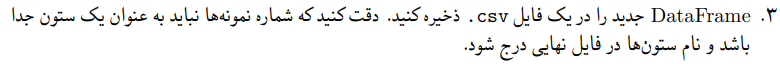

In [ ]:
import pandas as pd
import numpy as np # برای ایجاد داده‌های نمونه در صورت نیاز

# --- اطمینان از وجود دیتافریم features_df ---
# این دیتافریم باید از مرحله قبلی (استخراج ویژگی‌ها) موجود باشد.
# اگر این کد را در یک سلول جدید اجرا می‌کنید و features_df از قبل موجود نیست،
# یک دیتافریم نمونه برای نمایش عملکرد کد ایجاد می‌شود.
if 'features_df' not in locals() or not isinstance(features_df, pd.DataFrame) or features_df.empty:
    print("NOTICE: 'features_df' is not available, not a DataFrame, or is empty.")
    print("Creating a dummy DataFrame for the CSV saving example.")
    num_dummy_rows_for_csv = 10 # تعداد سطرهای نمونه برای دیتافریم ساختگی
    dummy_data_for_csv = {
        'Mean': np.random.normal(loc=0, scale=1, size=num_dummy_rows_for_csv),
        'Standard_Deviation': np.random.uniform(low=0.1, high=2.0, size=num_dummy_rows_for_csv),
        'RMS': np.random.normal(loc=0.5, scale=1.5, size=num_dummy_rows_for_csv)
    }
    features_df = pd.DataFrame(dummy_data_for_csv)
    print(f"Dummy 'features_df' for CSV saving created with shape: {features_df.shape}")
    print("Dummy features_df head:")
    print(features_df.head())
# --- پایان بخش داده‌های نمونه ---


# تعریف نام فایل CSV برای ذخیره‌سازی
csv_file_name = "extracted_statistical_features.csv"

if 'features_df' in locals() and isinstance(features_df, pd.DataFrame) and not features_df.empty:
    try:
        # ذخیره دیتافریم در یک فایل CSV
        # index=False: از نوشتن اندیس (شماره ردیف) دیتافریم به عنوان یک ستون در فایل CSV جلوگیری می‌کند.
        # header=True: نام ستون‌ها را به عنوان ردیف اول (سرآیند) در فایل CSV می‌نویسد (این حالت پیش‌فرض است).
        features_df.to_csv(csv_file_name, index=False, header=True)

        print(f"\nDataFrame successfully saved to '{csv_file_name}'")
        print(f"  - Index was not written to the CSV file.")
        print(f"  - Column names were included in the CSV file.")

        # نکته: فایل CSV در پوشه کاری فعلی (current working directory) اسکریپت پایتون شما ذخیره خواهد شد.
        # اگر از محیط‌هایی مانند Google Colab استفاده می‌کنید، می‌توانید فایل را در پنل فایل‌ها پیدا کنید.
        print(f"You can find the file '{csv_file_name}' in your current working directory.")

    except Exception as e:
        # مدیریت خطاهای احتمالی هنگام ذخیره‌سازی فایل
        print(f"\nError: Could not save the DataFrame to CSV file '{csv_file_name}'.")
        print(f"An error occurred: {e}")
else:
    # اگر دیتافریم features_df موجود نباشد یا خالی باشد.
    print("\nNOTICE: 'features_df' is not available, not a DataFrame, or is empty. Cannot save to CSV.")
    print("Please ensure the 'features_df' (DataFrame with extracted features) is created and populated from the previous step.")


DataFrame successfully saved to 'extracted_statistical_features.csv'
  - Index was not written to the CSV file.
  - Column names were included in the CSV file.
You can find the file 'extracted_statistical_features.csv' in your current working directory.


#**_3-2-1-1**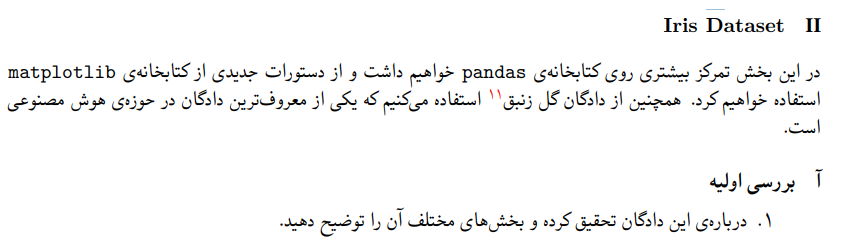

In [ ]:
#in pdf

#**_3-2-1-2**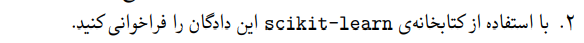

In [ ]:
import pandas as pd

# مسیر فایل CSV شما
file_path = "/content/sample_data/iris.csv"

try:
    # بارگذاری داده‌ها از فایل CSV به یک دیتافریم پانداز
    iris_df_from_csv = pd.read_csv(file_path)

    # نمایش اطلاعات اولیه برای تایید بارگذاری صحیح
    print(f"Successfully loaded data from: {file_path}")
    print("\nShape of the DataFrame (rows, columns):", iris_df_from_csv.shape)
    print("\nFirst 5 rows of the DataFrame (head()):")
    print(iris_df_from_csv.head())

    # نمایش اطلاعات کلی در مورد ستون‌ها و انواع داده‌ها
    print("\nDataFrame Info (اطلاعات دیتافریم):")
    iris_df_from_csv.info()

    # اگر فایل CSV شما ستون سرآیند (header) ندارد یا جداکننده (separator) آن کاما (,) نیست،
    # می‌توانید پارامترهای مناسب را به تابع read_csv اضافه کنید.
    # به عنوان مثال:
    # iris_df_from_csv = pd.read_csv(file_path, header=None, sep=';')

except FileNotFoundError:
    print(f"Error: The file was not found at the specified path: {file_path}")
    print("Please ensure the file path is correct and the file exists in that location.")
except Exception as e:
    print(f"An error occurred while trying to load the CSV file: {e}")

Successfully loaded data from: /content/sample_data/iris.csv

Shape of the DataFrame (rows, columns): (150, 5)

First 5 rows of the DataFrame (head()):
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

DataFrame Info (اطلاعات دیتافریم):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), obj

#**_3-2-1-3**image.png

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np # برای ایجاد داده‌های نمونه در صورت نیاز

# --- اطمینان از وجود دیتافریم iris_df_from_csv ---
# این دیتافریم باید از مرحله بارگذاری فایل CSV موجود باشد.
# اگر موجود نیست، یک دیتافریم نمونه برای نمایش عملکرد کد ایجاد می‌شود.
if 'iris_df_from_csv' not in locals() or not isinstance(iris_df_from_csv, pd.DataFrame) or iris_df_from_csv.empty:
    print("NOTICE: 'iris_df_from_csv' is not available, not a DataFrame, or is empty.")
    print("Creating a dummy DataFrame for the train/test split example.")
    # ستون‌های نمونه برای دادگان زنبق
    dummy_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    # ایجاد داده‌های ساختگی: ۱۵۰ نمونه، ۴ ویژگی عددی، ۱ ویژگی دسته‌ای برای گونه
    dummy_data_values = np.random.rand(150, 4) * np.array([3, 2, 5, 1]) + np.array([4, 2, 1, 0.1]) # مقادیر تقریبی برای ویژگی‌ها
    dummy_species = np.random.choice(['setosa', 'versicolor', 'virginica'], 150)
    iris_df_from_csv = pd.DataFrame(dummy_data_values, columns=dummy_columns[:4])
    iris_df_from_csv['species'] = dummy_species
    print(f"Dummy 'iris_df_from_csv' created with shape: {iris_df_from_csv.shape}")
    print("Dummy iris_df_from_csv head:")
    print(iris_df_from_csv.head())
# --- پایان بخش داده‌های نمونه ---


if 'iris_df_from_csv' in locals() and isinstance(iris_df_from_csv, pd.DataFrame) and not iris_df_from_csv.empty:
    # 1. جدا کردن ویژگی‌ها (X) از متغیر هدف (y)
    # فرض می‌کنیم نام ستون گونه 'species' است و بقیه ستون‌ها ویژگی‌ها هستند.
    # اگر نام ستون‌ها در فایل شما متفاوت است، این بخش را متناسب با آن تغییر دهید.

    feature_column_names = []
    target_column_name = ''

    # شناسایی خودکار ستون گونه (معمولاً رشته‌ای است) و ستون‌های ویژگی (معمولاً عددی)
    # این یک روش ساده برای تشخیص است و ممکن است نیاز به تنظیم دقیق‌تر بر اساس فایل شما داشته باشد.
    for col in iris_df_from_csv.columns:
        if iris_df_from_csv[col].dtype == 'object' or iris_df_from_csv[col].nunique() < 10: # فرض اولیه برای ستون گونه
            target_column_name = col
        elif pd.api.types.is_numeric_dtype(iris_df_from_csv[col]):
            feature_column_names.append(col)

    if not target_column_name and 'species' in iris_df_from_csv.columns: # یک نام رایج
        target_column_name = 'species'
    elif not target_column_name and 'variety' in iris_df_from_csv.columns: # نام رایج دیگر
        target_column_name = 'variety'

    # اگر ستون هدف شناسایی نشد یا ستون‌های ویژگی کافی نبود، یک پیش‌فرض استفاده می‌کنیم یا خطا می‌دهیم
    if not target_column_name or not feature_column_names:
        print("Error: Could not automatically determine feature and target columns.")
        print("Please manually define 'feature_column_names' and 'target_column_name'.")
        # استفاده از پیش‌فرض‌های رایج در صورت امکان (برای ادامه مثال)
        if 'species' in iris_df_from_csv.columns:
            target_column_name = 'species'
            feature_column_names = [col for col in iris_df_from_csv.columns if col != 'species']
        elif 'variety' in iris_df_from_csv.columns:
            target_column_name = 'variety'
            feature_column_names = [col for col in iris_df_from_csv.columns if col != 'variety']
        else:
            print("Stopping. Please inspect your DataFrame columns.")
            # برای جلوگیری از خطای بیشتر، در این نقطه متوقف می‌شویم اگر ستون‌ها مشخص نباشند
            feature_column_names = [] # Reset to prevent further execution if columns are truly unknown

    if feature_column_names and target_column_name:
        print(f"\nIdentified feature columns: {feature_column_names}")
        print(f"Identified target column: {target_column_name}")

        X = iris_df_from_csv[feature_column_names]
        y = iris_df_from_csv[target_column_name]

        # 2. تقسیم داده‌ها به مجموعه‌های آموزش و آزمون
        # test_size=0.25 یعنی ۲۵٪ داده‌ها برای آزمون و ۷۵٪ برای آموزش استفاده می‌شود.
        # random_state یک عدد دلخواه برای اطمینان از تکرارپذیری نتایج تقسیم‌بندی است.
        # stratify=y برای اطمینان از اینکه نسبت کلاس‌ها در مجموعه آموزش و آزمون مشابه باقی بماند (مهم برای طبقه‌بندی).
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=0.25,  # نسبت داده‌های آزمون
            random_state=42, # برای تکرارپذیری
            stratify=y       # برای حفظ نسبت کلاس‌ها در هر دو مجموعه
        )

        # 3. نمایش ابعاد مجموعه‌های ایجاد شده
        print("\nData successfully split into training and testing sets.")
        print("Shape of X_train (ویژگی‌های آموزش):", X_train.shape)
        print("Shape of X_test (ویژگی‌های آزمون):", X_test.shape)
        print("Shape of y_train (هدف آموزش):", y_train.shape)
        print("Shape of y_test (هدف آزمون):", y_test.shape)

        print("\nFirst 5 samples of X_train (۵ نمونه اول ویژگی‌های آموزش):")
        print(X_train.head())
        print("\nFirst 5 samples of y_train (۵ نمونه اول هدف آموزش):")
        print(y_train.head())
    else:
        if 'iris_df_from_csv' in locals() and not iris_df_from_csv.empty : # فقط اگر دیتافریم وجود دارد اما ستون‌ها پیدا نشدند
             print("\nCould not proceed with train/test split due to missing column definitions.")

elif 'iris_df_from_csv' in locals() and iris_df_from_csv.empty:
    print("\nNOTICE: 'iris_df_from_csv' is empty. Cannot perform train/test split.")
else:
    print("\nNOTICE: 'iris_df_from_csv' is not available. Cannot perform train/test split.")
    print("Please ensure the DataFrame 'iris_df_from_csv' is loaded correctly from the CSV file.")


Identified feature columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Identified target column: species

Data successfully split into training and testing sets.
Shape of X_train (ویژگی‌های آموزش): (112, 4)
Shape of X_test (ویژگی‌های آزمون): (38, 4)
Shape of y_train (هدف آموزش): (112,)
Shape of y_test (هدف آزمون): (38,)

First 5 samples of X_train (۵ نمونه اول ویژگی‌های آموزش):
     sepal_length  sepal_width  petal_length  petal_width
130           7.4          2.8           6.1          1.9
122           7.7          2.8           6.7          2.0
81            5.5          2.4           3.7          1.0
71            6.1          2.8           4.0          1.3
89            5.5          2.5           4.0          1.3

First 5 samples of y_train (۵ نمونه اول هدف آموزش):
130     virginica
122     virginica
81     versicolor
71     versicolor
89     versicolor
Name: species, dtype: object


#**_3-2-1-4**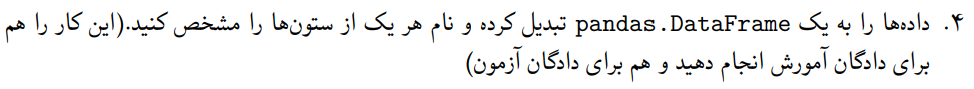

In [ ]:
import pandas as pd
import numpy as np # Required for the dummy data placeholder

# Assume X_train, X_test, y_train, y_test are available from the previous train_test_split step.
# Also assume feature_column_names (list of strings) and target_column_name (string) are defined.

# --- Placeholder for variables if not available (for testing this snippet independently) ---
if 'X_train' not in locals() or 'X_test' not in locals() or \
   'y_train' not in locals() or 'y_test' not in locals() or \
   'feature_column_names' not in locals() or 'target_column_name' not in locals():

    print("NOTICE: Required variables (X_train, X_test, y_train, y_test, feature_column_names, target_column_name) "
          "are not available. Creating dummy ones for demonstration.")

    feature_column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    target_column_name = 'species' # This is the name we'll use for the y_train/y_test DataFrame column

    # Create dummy X_train, X_test (DataFrames)
    X_train_data = np.random.rand(112, len(feature_column_names))
    X_train = pd.DataFrame(X_train_data, columns=feature_column_names)

    X_test_data = np.random.rand(38, len(feature_column_names))
    X_test = pd.DataFrame(X_test_data, columns=feature_column_names)

    # Create dummy y_train, y_test (Series)
    # The Series should have a name, which train_test_split usually preserves from the original y Series/DataFrame column
    y_train_values = np.random.choice(['setosa', 'versicolor', 'virginica'], 112)
    y_train = pd.Series(y_train_values, name=target_column_name)

    y_test_values = np.random.choice(['setosa', 'versicolor', 'virginica'], 38)
    y_test = pd.Series(y_test_values, name=target_column_name)

    print(f"Dummy feature_column_names: {feature_column_names}")
    print(f"Dummy target_column_name: {target_column_name}")
    print(f"Dummy X_train shape: {X_train.shape}, Dummy X_test shape: {X_test.shape}")
    print(f"Dummy y_train shape: {y_train.shape} (name: {y_train.name}), Dummy y_test shape: {y_test.shape} (name: {y_test.name})")
    print("--- End of placeholder section ---")
# --- End of placeholder section ---

# --- دادگان آموزش (Training Data) ---
print("\n--- دادگان آموزش (Training Data) ---")

# Features for training data (X_train)
# X_train should already be a DataFrame if the input X to train_test_split was a DataFrame.
# Its column names are preserved from 'feature_column_names'.
print("\nویژگی‌های آموزش (X_train):")
if isinstance(X_train, pd.DataFrame):
    print(f"  نوع X_train: DataFrame")
    print(f"  شکل X_train: {X_train.shape}")
    print(f"  نام ستون‌های X_train: {X_train.columns.tolist()}") # Displaying specified column names
    print("  ۵ سطر اول X_train:")
    print(X_train.head())
else:
    # Fallback if X_train is not a DataFrame (e.g., if input X was a NumPy array)
    # Convert to DataFrame and assign column names
    if 'feature_column_names' in locals() and len(feature_column_names) == X_train.shape[1]:
        X_train_df = pd.DataFrame(X_train, columns=feature_column_names)
        print(f"  نوع X_train: {type(X_train)} (تبدیل شده به DataFrame)")
        print(f"  شکل X_train_df: {X_train_df.shape}")
        print(f"  نام ستون‌های X_train_df: {X_train_df.columns.tolist()}")
        print("  ۵ سطر اول X_train_df:")
        print(X_train_df.head())
    else:
        print(f"  توجه: X_train یک DataFrame نیست و نام ستون‌های ویژگی (feature_column_names) تعریف نشده یا با ابعاد داده‌ها همخوانی ندارد.")
        print(f"  نوع X_train: {type(X_train)}")

# Target for training data (y_train)
# y_train is typically a pandas Series. We'll convert it to a DataFrame.
print("\nهدف آموزش (y_train):")
if isinstance(y_train, pd.Series):
    # Convert Series to DataFrame and specify the column name using target_column_name
    y_train_df = pd.DataFrame(y_train, columns=[target_column_name if 'target_column_name' in locals() and target_column_name else y_train.name or 'target'])
    print(f"  نوع y_train_df: DataFrame (تبدیل شده از Series)")
    print(f"  شکل y_train_df: {y_train_df.shape}")
    print(f"  نام ستون y_train_df: {y_train_df.columns.tolist()}") # Displaying specified column name
    print("  ۵ سطر اول y_train_df:")
    print(y_train_df.head())
elif isinstance(y_train, pd.DataFrame): # If y_train is already a DataFrame
    y_train_df = y_train # Use as is
    print(f"  نوع y_train_df: DataFrame")
    print(f"  شکل y_train_df: {y_train_df.shape}")
    print(f"  نام ستون‌های y_train_df: {y_train_df.columns.tolist()}")
    print("  ۵ سطر اول y_train_df:")
    print(y_train_df.head())
else:
    print(f"  توجه: y_train نه Series است و نه DataFrame. نوع آن: {type(y_train)}")


# --- دادگان آزمون (Test Data) ---
print("\n\n--- دادگان آزمون (Test Data) ---")

# Features for test data (X_test)
# X_test should also be a DataFrame with preserved column names.
print("\nویژگی‌های آزمون (X_test):")
if isinstance(X_test, pd.DataFrame):
    print(f"  نوع X_test: DataFrame")
    print(f"  شکل X_test: {X_test.shape}")
    print(f"  نام ستون‌های X_test: {X_test.columns.tolist()}") # Displaying specified column names
    print("  ۵ سطر اول X_test:")
    print(X_test.head())
else:
    # Fallback if X_test is not a DataFrame
    if 'feature_column_names' in locals() and len(feature_column_names) == X_test.shape[1]:
        X_test_df = pd.DataFrame(X_test, columns=feature_column_names)
        print(f"  نوع X_test: {type(X_test)} (تبدیل شده به DataFrame)")
        print(f"  شکل X_test_df: {X_test_df.shape}")
        print(f"  نام ستون‌های X_test_df: {X_test_df.columns.tolist()}")
        print("  ۵ سطر اول X_test_df:")
        print(X_test_df.head())
    else:
        print(f"  توجه: X_test یک DataFrame نیست و نام ستون‌های ویژگی (feature_column_names) تعریف نشده یا با ابعاد داده‌ها همخوانی ندارد.")
        print(f"  نوع X_test: {type(X_test)}")

# Target for test data (y_test)
# y_test is typically a pandas Series. We'll convert it to a DataFrame.
print("\nهدف آزمون (y_test):")
if isinstance(y_test, pd.Series):
    # Convert Series to DataFrame and specify the column name using target_column_name
    y_test_df = pd.DataFrame(y_test, columns=[target_column_name if 'target_column_name' in locals() and target_column_name else y_test.name or 'target'])
    print(f"  نوع y_test_df: DataFrame (تبدیل شده از Series)")
    print(f"  شکل y_test_df: {y_test_df.shape}")
    print(f"  نام ستون y_test_df: {y_test_df.columns.tolist()}") # Displaying specified column name
    print("  ۵ سطر اول y_test_df:")
    print(y_test_df.head())
elif isinstance(y_test, pd.DataFrame): # If y_test is already a DataFrame
    y_test_df = y_test # Use as is
    print(f"  نوع y_test_df: DataFrame")
    print(f"  شکل y_test_df: {y_test_df.shape}")
    print(f"  نام ستون‌های y_test_df: {y_test_df.columns.tolist()}")
    print("  ۵ سطر اول y_test_df:")
    print(y_test_df.head())
else:
    print(f"  توجه: y_test نه Series است و نه DataFrame. نوع آن: {type(y_test)}")


--- دادگان آموزش (Training Data) ---

ویژگی‌های آموزش (X_train):
  نوع X_train: DataFrame
  شکل X_train: (112, 4)
  نام ستون‌های X_train: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
  ۵ سطر اول X_train:
     sepal_length  sepal_width  petal_length  petal_width
130           7.4          2.8           6.1          1.9
122           7.7          2.8           6.7          2.0
81            5.5          2.4           3.7          1.0
71            6.1          2.8           4.0          1.3
89            5.5          2.5           4.0          1.3

هدف آموزش (y_train):
  نوع y_train_df: DataFrame (تبدیل شده از Series)
  شکل y_train_df: (112, 1)
  نام ستون y_train_df: ['species']
  ۵ سطر اول y_train_df:
        species
130   virginica
122   virginica
81   versicolor
71   versicolor
89   versicolor


--- دادگان آزمون (Test Data) ---

ویژگی‌های آزمون (X_test):
  نوع X_test: DataFrame
  شکل X_test: (38, 4)
  نام ستون‌های X_test: ['sepal_length', 'sepal_width', 'petal_lengt

#**_3-2-1-5**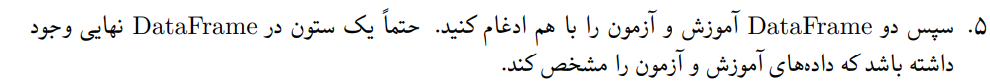

In [ ]:
import pandas as pd
import numpy as np # Required for the dummy data placeholder

# Assume X_train, X_test (DataFrames with features),
# y_train_df, y_test_df (DataFrames with the target column) are available
# from the previous steps.

# --- Placeholder for variables if not available (for testing this snippet independently) ---
if 'X_train' not in locals() or 'X_test' not in locals() or \
   'y_train_df' not in locals() or 'y_test_df' not in locals():

    print("NOTICE: Required DataFrames (X_train, X_test, y_train_df, y_test_df) "
          "are not available. Creating dummy ones for demonstration.")

    _feature_column_names_ph = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    _target_column_name_ph = 'species' # This should be the column name in y_train_df and y_test_df

    _X_train_data_ph = np.random.rand(112, len(_feature_column_names_ph))
    X_train = pd.DataFrame(_X_train_data_ph, columns=_feature_column_names_ph)

    _X_test_data_ph = np.random.rand(38, len(_feature_column_names_ph))
    X_test = pd.DataFrame(_X_test_data_ph, columns=_feature_column_names_ph)

    _y_train_values_ph = np.random.choice(['setosa', 'versicolor', 'virginica'], 112)
    # Ensure y_train_df has the same index as X_train for proper concatenation later
    y_train_df = pd.DataFrame(_y_train_values_ph, columns=[_target_column_name_ph], index=X_train.index)

    _y_test_values_ph = np.random.choice(['setosa', 'versicolor', 'virginica'], 38)
    # Ensure y_test_df has the same index as X_test
    y_test_df = pd.DataFrame(_y_test_values_ph, columns=[_target_column_name_ph], index=X_test.index)

    print(f"Dummy X_train shape: {X_train.shape}, Dummy y_train_df shape: {y_train_df.shape}")
    print(f"Dummy X_test shape: {X_test.shape}, Dummy y_test_df shape: {y_test_df.shape}")
    print("--- End of placeholder section ---")
# --- End of placeholder section ---

# 1. Reconstruct full training and testing DataFrames
# This assumes X_train and y_train_df (and X_test, y_test_df) have aligned indices,
# which should be the case if they originated from train_test_split correctly.
# pd.concat with axis=1 combines columns.
try:
    train_df_full = pd.concat([X_train, y_train_df], axis=1)
    test_df_full = pd.concat([X_test, y_test_df], axis=1)

    # 2. Add the indicator column "Dataset_Type"
    # This column will specify whether the row belongs to the training or testing set.
    train_df_full['Dataset_Type'] = 'Training' # شما می‌توانید از 'آموزش' استفاده کنید
    test_df_full['Dataset_Type'] = 'Testing'   # شما می‌توانید از 'آزمون' استفاده کنید

    # 3. Merge (concatenate) the complete training and testing DataFrames
    # axis=0 concatenates row-wise.
    combined_df = pd.concat([train_df_full, test_df_full], axis=0)

    # Optional: Reset the index of the final combined DataFrame if you want a clean 0-based index.
    # combined_df.reset_index(drop=True, inplace=True)

    # Display information about the final combined DataFrame
    print("\n--- دیتافریم ادغام شده نهایی (Final Combined DataFrame) ---")
    if not combined_df.empty:
        print(f"\nشکل دیتافریم ادغام شده: {combined_df.shape}")
        print("\n۵ سطر اول دیتافریم ادغام شده:")
        print(combined_df.head())
        print("\n۵ سطر آخر دیتافریم ادغام شده (برای مشاهده نمونه‌های آزمون و اطمینان از ادغام صحیح):")
        print(combined_df.tail())
        print("\nبررسی توزیع مقادیر در ستون 'Dataset_Type' (برای اطمینان از تعداد نمونه‌های آموزش و آزمون):")
        print(combined_df['Dataset_Type'].value_counts())

        # نمایش اطلاعات کلی برای بررسی نوع داده‌ها و مقادیر غیر نال
        print("\nاطلاعات کلی دیتافریم ادغام شده (info()):")
        combined_df.info()
    else:
        print("دیتافریم ادغام شده نهایی خالی است. لطفاً مراحل قبلی را بررسی کنید.")

except NameError as ne:
    print(f"\nخطا: یک یا چند متغیر مورد نیاز (X_train, y_train_df, X_test, y_test_df) تعریف نشده‌اند. {ne}")
    print("لطفاً مطمئن شوید که مراحل قبلی به درستی اجرا شده‌اند.")
except ValueError as ve:
    print(f"\nخطا در هنگام ادغام دیتافریم‌ها: {ve}")
    print("این خطا ممکن است به دلیل عدم همخوانی اندیس‌ها یا نام ستون‌ها در هنگام استفاده از concat رخ داده باشد.")
except Exception as e:
    print(f"\nیک خطای پیش‌بینی نشده رخ داد: {e}")


--- دیتافریم ادغام شده نهایی (Final Combined DataFrame) ---

شکل دیتافریم ادغام شده: (150, 6)

۵ سطر اول دیتافریم ادغام شده:
     sepal_length  sepal_width  petal_length  petal_width     species  \
130           7.4          2.8           6.1          1.9   virginica   
122           7.7          2.8           6.7          2.0   virginica   
81            5.5          2.4           3.7          1.0  versicolor   
71            6.1          2.8           4.0          1.3  versicolor   
89            5.5          2.5           4.0          1.3  versicolor   

    Dataset_Type  
130     Training  
122     Training  
81      Training  
71      Training  
89      Training  

۵ سطر آخر دیتافریم ادغام شده (برای مشاهده نمونه‌های آزمون و اطمینان از ادغام صحیح):
     sepal_length  sepal_width  petal_length  petal_width     species  \
28            5.2          3.4           1.4          0.2      setosa   
35            5.0          3.2           1.2          0.2      setosa   
23            5.1

#**_3-2-2-1**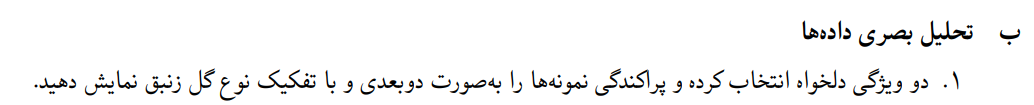


Plotting 2D scatter plot using features: 'petal_length' and 'petal_width'
Color-coding by target column: 'species'


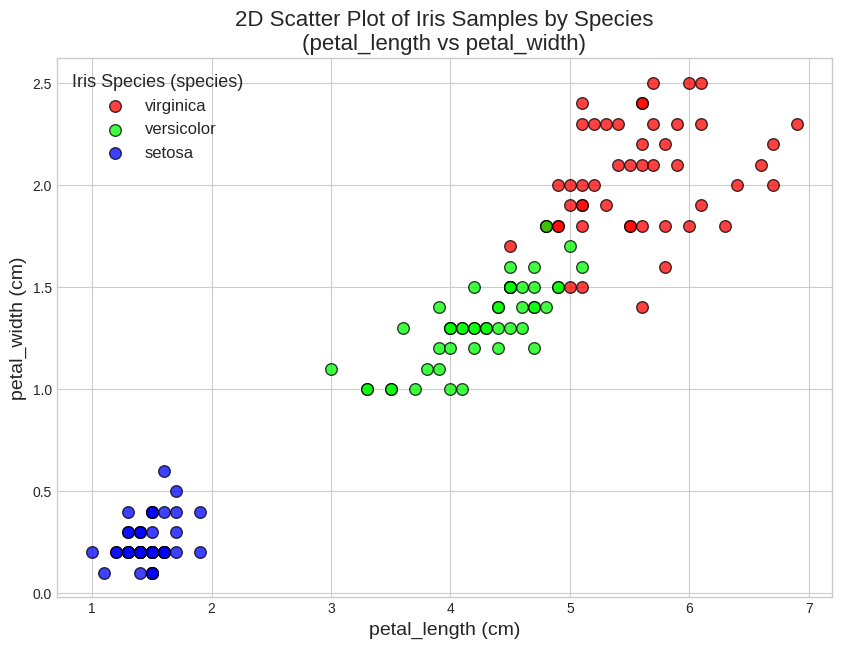

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Required for the dummy data placeholder

# Assume 'combined_df' is available from the previous step.
# It should contain feature columns and the target species column.
# Assume 'target_column_name' (e.g., 'species') and 'feature_column_names' (list) are also defined.

# --- Placeholder for combined_df and related variables if not available ---
if 'combined_df' not in locals() or not isinstance(combined_df, pd.DataFrame) or combined_df.empty:
    print("NOTICE: 'combined_df' is not available or empty. Creating a dummy one for plotting example.")
    # Define dummy feature and target column names if not already defined globally
    if 'feature_column_names' not in locals():
        feature_column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    if 'target_column_name' not in locals():
        target_column_name = 'species'

    _num_samples_ph_plot = 150

    _dummy_features_data = np.random.rand(_num_samples_ph_plot, len(feature_column_names))
    # Scale dummy features to be somewhat like Iris
    _dummy_features_data[:, 0] = _dummy_features_data[:, 0] * 3.5 + 4.3 # Sepal Length
    _dummy_features_data[:, 1] = _dummy_features_data[:, 1] * 2.4 + 2.0 # Sepal Width
    if len(feature_column_names) > 2:
        _dummy_features_data[:, 2] = _dummy_features_data[:, 2] * 5.9 + 1.0 # Petal Length
    if len(feature_column_names) > 3:
        _dummy_features_data[:, 3] = _dummy_features_data[:, 3] * 2.4 + 0.1 # Petal Width

    _dummy_species_list = np.random.choice(['setosa', 'versicolor', 'virginica'], _num_samples_ph_plot)

    combined_df = pd.DataFrame(_dummy_features_data, columns=feature_column_names)
    combined_df[target_column_name] = _dummy_species_list
    combined_df['Dataset_Type'] = np.random.choice(['Training', 'Testing'], _num_samples_ph_plot) # For placeholder completeness

    print(f"Dummy 'combined_df' created with shape: {combined_df.shape}")
    print(f"Using features: {feature_column_names}, and target: {target_column_name}")
    print(combined_df.head())
    print("--- End of placeholder section for combined_df ---")
# --- End of placeholder section ---


# Proceed only if combined_df and necessary column name variables exist
can_plot_2d = False
feature1_2d_name = None
feature2_2d_name = None

if 'combined_df' in locals() and isinstance(combined_df, pd.DataFrame) and not combined_df.empty and \
   'target_column_name' in locals() and target_column_name in combined_df.columns:

    # 1. Choose two features for the scatter plot.
    # Prioritize 'petal_length' and 'petal_width' if they exist.
    if 'petal_length' in combined_df.columns and 'petal_width' in combined_df.columns:
        feature1_2d_name = 'petal_length'
        feature2_2d_name = 'petal_width'
        can_plot_2d = True
    # Fallback to features defined in feature_column_names
    elif 'feature_column_names' in locals() and isinstance(feature_column_names, list) and len(feature_column_names) >= 2:
        f1_candidate = feature_column_names[0]
        f2_candidate = feature_column_names[1]
        if f1_candidate in combined_df.columns and f2_candidate in combined_df.columns and f1_candidate != f2_candidate:
            feature1_2d_name = f1_candidate
            feature2_2d_name = f2_candidate
            can_plot_2d = True
            print(f"Note: Using features '{feature1_2d_name}' and '{feature2_2d_name}' for the plot (as 'petal_length'/'petal_width' were not found or feature_column_names list was used).")
        else:
             # Try another pair if first two from list are not distinct or not found
            if len(feature_column_names) >= 4 and \
               feature_column_names[2] in combined_df.columns and \
               feature_column_names[3] in combined_df.columns and \
               feature_column_names[2] != feature_column_names[3]:
                feature1_2d_name = feature_column_names[2]
                feature2_2d_name = feature_column_names[3]
                can_plot_2d = True
                print(f"Note: Using features '{feature1_2d_name}' and '{feature2_2d_name}' for the plot from feature_column_names list.")
            else: # Try to find any two distinct valid features from feature_column_names
                found_pair = False
                if len(feature_column_names) >=2:
                    for i in range(len(feature_column_names)):
                        for j in range(i + 1, len(feature_column_names)):
                            f1_cand = feature_column_names[i]
                            f2_cand = feature_column_names[j]
                            if f1_cand in combined_df.columns and f2_cand in combined_df.columns:
                                feature1_2d_name = f1_cand
                                feature2_2d_name = f2_cand
                                can_plot_2d = True
                                print(f"Note: Using features '{feature1_2d_name}' and '{feature2_2d_name}' for the plot from feature_column_names list.")
                                found_pair = True
                                break
                        if found_pair:
                            break
                if not found_pair:
                    print(f"Error: Could not find two distinct, valid features from the feature_column_names list in the DataFrame.")

    if not can_plot_2d and not (feature1_2d_name and feature2_2d_name) : # Final check if no features selected
        print("Error: Could not select two suitable and distinct features for the 2D scatter plot from available columns.")

    # 2. If features are selected, proceed with plotting
    if can_plot_2d and feature1_2d_name and feature2_2d_name:
        print(f"\nPlotting 2D scatter plot using features: '{feature1_2d_name}' and '{feature2_2d_name}'")
        print(f"Color-coding by target column: '{target_column_name}'")

        # Get unique species names for iteration and legend
        species_names_2d = combined_df[target_column_name].unique()

        # Define a color map for different species (for standard 3 Iris species)
        default_color_list_2d = ['#FF0000', '#00FF00', '#0000FF', '#FFA500', '#800080', '#A52A2A'] # Red, Green, Blue, Orange, Purple, Brown
        color_map_2d = {}
        for i, species in enumerate(species_names_2d):
            color_map_2d[species] = default_color_list_2d[i % len(default_color_list_2d)]


        # 3. Create the scatter plot
        plt.style.use('seaborn-v0_8-whitegrid') # Using a pleasant style
        plt.figure(figsize=(10, 7)) # Define figure size

        for species_name in species_names_2d:
            # Filter data for the current species
            species_data_2d = combined_df[combined_df[target_column_name] == species_name]

            # Create scatter plot for this species
            plt.scatter(species_data_2d[feature1_2d_name],
                        species_data_2d[feature2_2d_name],
                        c=color_map_2d.get(species_name, 'grey'), # Use color from map, default to grey
                        label=str(species_name), # Label for the legend
                        alpha=0.75, # Transparency
                        edgecolors='k', # Edge color for points
                        s=70) # Size of points

        # 4. Add title, labels, and legend
        plt.title(f'2D Scatter Plot of Iris Samples by Species\n({feature1_2d_name} vs {feature2_2d_name})', fontsize=16)
        plt.xlabel(f"{feature1_2d_name} (cm)", fontsize=14)
        plt.ylabel(f"{feature2_2d_name} (cm)", fontsize=14)

        # Create legend
        plt.legend(title=f"Iris Species ({target_column_name})", fontsize=12, title_fontsize=13)

        plt.show() # Display the plot
else:
    print("\n'combined_df' DataFrame is not available for 2D scatter plot, is empty, or target/feature column names are not correctly defined.")
    print("Please check the previous steps and the column names in your DataFrame.")

#**_3-2-2-2**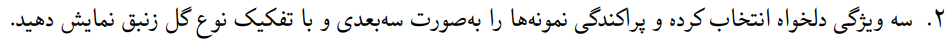

Note: Using features 'petal_length', 'petal_width', and 'sepal_length' for the 3D scatter plot.

Plotting 3D scatter plot using features: 'petal_length', 'petal_width', and 'sepal_length'
Color-coding by target column: 'species'


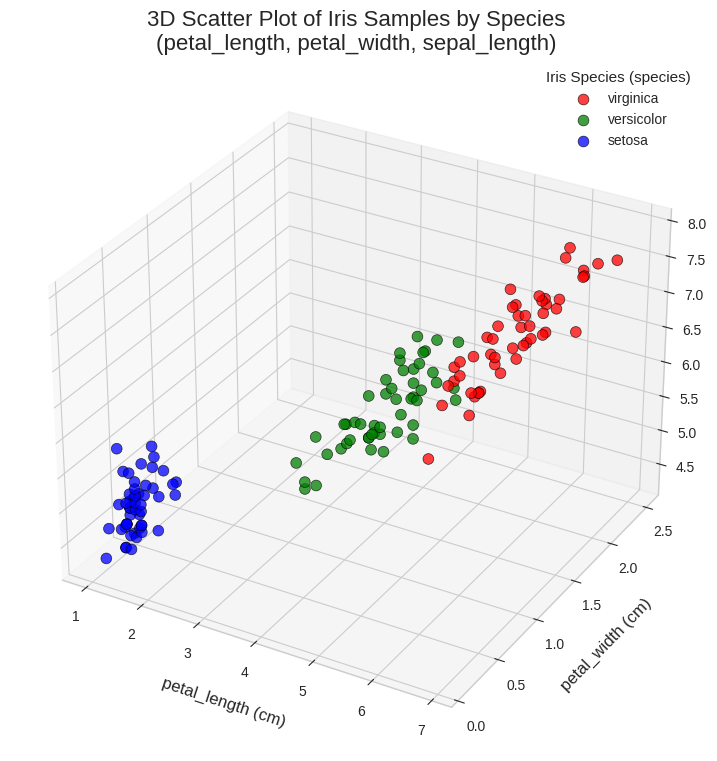

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Required for 3D plotting
import pandas as pd
import numpy as np # Required for dummy data placeholder

# Assume 'combined_df' is available from the previous step.
# It should contain feature columns and the target species column.
# Also assume 'target_column_name' (e.g., 'species') and 'feature_column_names' (list) are also defined.

# --- Placeholder for combined_df and related variables if not available ---
if 'combined_df' not in locals() or not isinstance(combined_df, pd.DataFrame) or combined_df.empty:
    print("NOTICE: 'combined_df' is not available or empty. Creating a dummy one for 3D plotting example.")
    # Define dummy feature and target column names if not already defined globally
    if 'feature_column_names' not in locals():
        feature_column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    if 'target_column_name' not in locals():
        target_column_name = 'species'

    _num_samples_ph_3d = 150

    _dummy_features_3d_data = np.random.rand(_num_samples_ph_3d, max(3, len(feature_column_names)))
    _dummy_features_3d_data[:, 0] = _dummy_features_3d_data[:, 0] * 3.5 + 4.3 # Sepal Length
    _dummy_features_3d_data[:, 1] = _dummy_features_3d_data[:, 1] * 2.4 + 2.0 # Sepal Width
    if _dummy_features_3d_data.shape[1] > 2:
        _dummy_features_3d_data[:, 2] = _dummy_features_3d_data[:, 2] * 5.9 + 1.0 # Petal Length
    if _dummy_features_3d_data.shape[1] > 3:
        _dummy_features_3d_data[:, 3] = _dummy_features_3d_data[:, 3] * 2.4 + 0.1 # Petal Width

    _dummy_species_list_3d = np.random.choice(['setosa', 'versicolor', 'virginica'], _num_samples_ph_3d)

    combined_df = pd.DataFrame(_dummy_features_3d_data[:, :len(feature_column_names)], columns=feature_column_names)
    combined_df[target_column_name] = _dummy_species_list_3d
    combined_df['Dataset_Type'] = np.random.choice(['Training', 'Testing'], _num_samples_ph_3d)

    print(f"Dummy 'combined_df' created with shape: {combined_df.shape}")
    print(f"Using features: {feature_column_names}, and target: {target_column_name}")
    print(combined_df.head())
    print("--- End of placeholder section for combined_df ---")
# --- End of placeholder section ---


# Start of the main code for 3D plotting
can_plot_3d = False
feature1_3d, feature2_3d, feature3_3d = None, None, None

if 'combined_df' in locals() and isinstance(combined_df, pd.DataFrame) and not combined_df.empty and \
   'target_column_name' in locals() and target_column_name in combined_df.columns:

    # 1. Choose three arbitrary features for the 3D scatter plot.
    # Priority is given to common combinations or the first three available features.
    potential_feature_sets_3d = [
        ('petal_length', 'petal_width', 'sepal_length'), # A common combination
        ('sepal_length', 'sepal_width', 'petal_length'), # Another common combination
    ]
    # Add fallback options based on feature_column_names
    if 'feature_column_names' in locals() and isinstance(feature_column_names, list):
        if len(feature_column_names) >= 3:
            potential_feature_sets_3d.append((feature_column_names[0], feature_column_names[1], feature_column_names[2]))
        if len(feature_column_names) >= 4:
             potential_feature_sets_3d.append((feature_column_names[0], feature_column_names[2], feature_column_names[3]))


    for f1, f2, f3 in potential_feature_sets_3d:
        # Check if all three features are valid, present in the DataFrame, and unique
        if f1 and f2 and f3 and \
           f1 in combined_df.columns and f2 in combined_df.columns and f3 in combined_df.columns and \
           len(set([f1, f2, f3])) == 3: # Ensure three unique features
            feature1_3d, feature2_3d, feature3_3d = f1, f2, f3
            can_plot_3d = True
            print(f"Note: Using features '{f1}', '{f2}', and '{f3}' for the 3D scatter plot.")
            break # First valid combination found

    if not can_plot_3d:
        print("Error: Could not select three suitable and distinct features for the 3D scatter plot from available columns or feature_column_names list.")

    # 2. If features are selected, proceed with plotting
    if can_plot_3d:
        print(f"\nPlotting 3D scatter plot using features: '{feature1_3d}', '{feature2_3d}', and '{feature3_3d}'")
        print(f"Color-coding by target column: '{target_column_name}'")

        # Extract unique species names
        species_names_3d = combined_df[target_column_name].unique()

        # Define colors for each species (for standard 3 Iris species)
        # If more species, this map needs extension or use a default color cycle.
        default_color_list = ['r', 'g', 'b', 'c', 'm', 'y', 'k'] # A list of default colors
        color_map_3d = {}
        for i, species in enumerate(species_names_3d):
            color_map_3d[species] = default_color_list[i % len(default_color_list)]

        # 3. Create the 3D scatter plot
        fig = plt.figure(figsize=(12, 9)) # Define figure size
        ax = fig.add_subplot(111, projection='3d') # Add a 3D subplot

        for species_name in species_names_3d:
            # Filter data for the current species
            species_data_3d = combined_df[combined_df[target_column_name] == species_name]

            # Plot scatter points for the current species
            ax.scatter(species_data_3d[feature1_3d],
                       species_data_3d[feature2_3d],
                       species_data_3d[feature3_3d],
                       c=color_map_3d.get(species_name), # Set color based on species
                       label=str(species_name),      # Label for the legend
                       s=60,                         # Size of points
                       alpha=0.75,                   # Transparency of points
                       edgecolors='k',               # Edge color of points
                       linewidth=0.5,                # Linewidth of point edges
                       depthshade=True)              # Enable depth Cues

        # 4. Add title, axis labels, and legend
        ax.set_title(f'3D Scatter Plot of Iris Samples by Species\n({feature1_3d}, {feature2_3d}, {feature3_3d})', fontsize=16)
        ax.set_xlabel(f"{feature1_3d} (cm)", fontsize=12, labelpad=10)
        ax.set_ylabel(f"{feature2_3d} (cm)", fontsize=12, labelpad=10)
        ax.set_zlabel(f"{feature3_3d} (cm)", fontsize=12, labelpad=10)

        # Create legend
        ax.legend(title=f"Iris Species ({target_column_name})", fontsize=10, title_fontsize=11)

        # Optional: Set an initial viewing angle for better visualization
        # ax.view_init(elev=20, azim=45) # elev: elevation angle, azim: azimuth angle

        plt.show() # Display the plot
else:
    print("\n'combined_df' DataFrame is not available for 3D scatter plot, is empty, or target/feature column names are not correctly defined.")
    print("Please check the previous steps and the column names in your DataFrame.")

#**_3-2-2-3**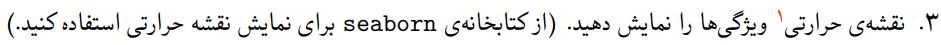


Calculating correlation matrix for features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


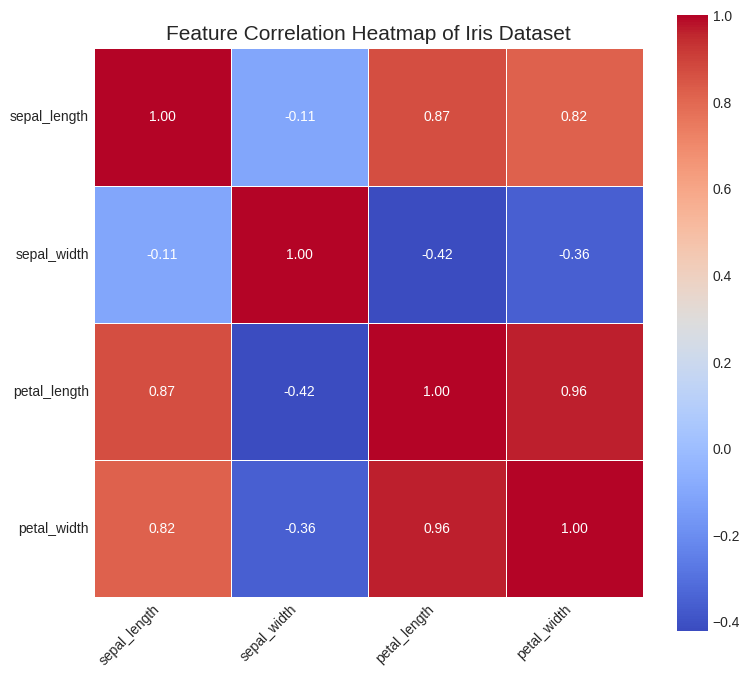

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Required for the dummy data placeholder

# Assume 'combined_df' is available from previous steps,
# and 'feature_column_names' (list of strings for feature columns) is also defined.

# --- Placeholder for combined_df and feature_column_names if not available ---
if 'combined_df' not in locals() or not isinstance(combined_df, pd.DataFrame) or combined_df.empty or \
   'feature_column_names' not in locals() or not isinstance(feature_column_names, list) or not feature_column_names:
    print("NOTICE: 'combined_df' or 'feature_column_names' are not available or empty. "
          "Creating dummy data for heatmap example.")

    # Define dummy feature column names if not already defined globally
    if 'feature_column_names' not in locals() or not feature_column_names : # Check if it's empty or not defined
        feature_column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

    _target_column_name_ph_hm = 'species' # Dummy target column name
    _num_samples_ph_hm = 150

    # Create dummy features based on the length of feature_column_names
    _dummy_features_hm_data = np.random.rand(_num_samples_ph_hm, len(feature_column_names))
    # Apply some scaling if standard Iris feature names are used
    if 'sepal_length' in feature_column_names:
        _dummy_features_hm_data[:, feature_column_names.index('sepal_length')] = _dummy_features_hm_data[:, feature_column_names.index('sepal_length')] * 3.5 + 4.3
    if 'sepal_width' in feature_column_names:
        _dummy_features_hm_data[:, feature_column_names.index('sepal_width')] = _dummy_features_hm_data[:, feature_column_names.index('sepal_width')] * 2.4 + 2.0
    if 'petal_length' in feature_column_names:
        _dummy_features_hm_data[:, feature_column_names.index('petal_length')] = _dummy_features_hm_data[:, feature_column_names.index('petal_length')] * 5.9 + 1.0
    if 'petal_width' in feature_column_names:
         _dummy_features_hm_data[:, feature_column_names.index('petal_width')] = _dummy_features_hm_data[:, feature_column_names.index('petal_width')] * 2.4 + 0.1

    _dummy_species_list_hm = np.random.choice(['setosa', 'versicolor', 'virginica'], _num_samples_ph_hm)

    combined_df = pd.DataFrame(_dummy_features_hm_data, columns=feature_column_names)
    combined_df[_target_column_name_ph_hm] = _dummy_species_list_hm # Add species column
    combined_df['Dataset_Type'] = np.random.choice(['Training', 'Testing'], _num_samples_ph_hm) # Add type column

    print(f"Dummy 'combined_df' created with shape: {combined_df.shape}")
    print(f"Using features for heatmap: {feature_column_names}")
    print(combined_df.head())
    print("--- End of placeholder section ---")
# --- End of placeholder section ---


if 'combined_df' in locals() and isinstance(combined_df, pd.DataFrame) and not combined_df.empty and \
   'feature_column_names' in locals() and isinstance(feature_column_names, list) and feature_column_names:

    # 1. Select only the feature columns from the combined_df
    # Ensure all feature_column_names exist in combined_df and are numerical for correlation
    actual_feature_columns_for_corr = []
    for col in feature_column_names:
        if col in combined_df.columns:
            if pd.api.types.is_numeric_dtype(combined_df[col]):
                actual_feature_columns_for_corr.append(col)
            else:
                print(f"Warning: Column '{col}' from feature_column_names is not numerical and will be excluded from correlation heatmap.")
        else:
            print(f"Warning: Column '{col}' from feature_column_names not found in combined_df.")

    if len(actual_feature_columns_for_corr) < 2:
        print(f"Error: Need at least two numerical feature columns to create a correlation heatmap. "
              f"Found suitable columns: {actual_feature_columns_for_corr}")
    else:
        features_only_df_for_corr = combined_df[actual_feature_columns_for_corr]

        # 2. Calculate the correlation matrix of these features
        print(f"\nCalculating correlation matrix for features: {actual_feature_columns_for_corr}")
        correlation_matrix = features_only_df_for_corr.corr()

        # 3. Display the heatmap using seaborn
        plt.figure(figsize=(8, 7)) # Set the figure size for better readability

        sns.heatmap(correlation_matrix,
                    annot=True,     # Display the correlation values on the heatmap cells
                    cmap='coolwarm', # Choose a colormap (e.g., 'coolwarm', 'viridis', 'YlGnBu', 'RdYlGn')
                    fmt=".2f",      # Format for the annotations (2 decimal places)
                    linewidths=.5,  # Add lines between cells
                    cbar=True,      # Show color bar
                    square=True)    # Ensure cells are square

        plt.title('Feature Correlation Heatmap of Iris Dataset', fontsize=15)
        # Adjust tick labels for better visibility if needed
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
        plt.tight_layout() # Adjust layout to prevent labels from overlapping and ensure everything fits
        plt.show()
else:
    print("\n'combined_df' is not available/empty or 'feature_column_names' are not properly defined. "
          "Cannot generate heatmap.")
    print("Please ensure 'combined_df' contains the numerical feature columns and the 'feature_column_names' list is correctly set up.")

#**_3-2-2-4**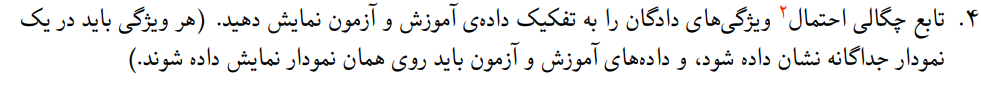


Generating Kernel Density Estimate (KDE) plots for 4 features, separated by Training/Testing sets...


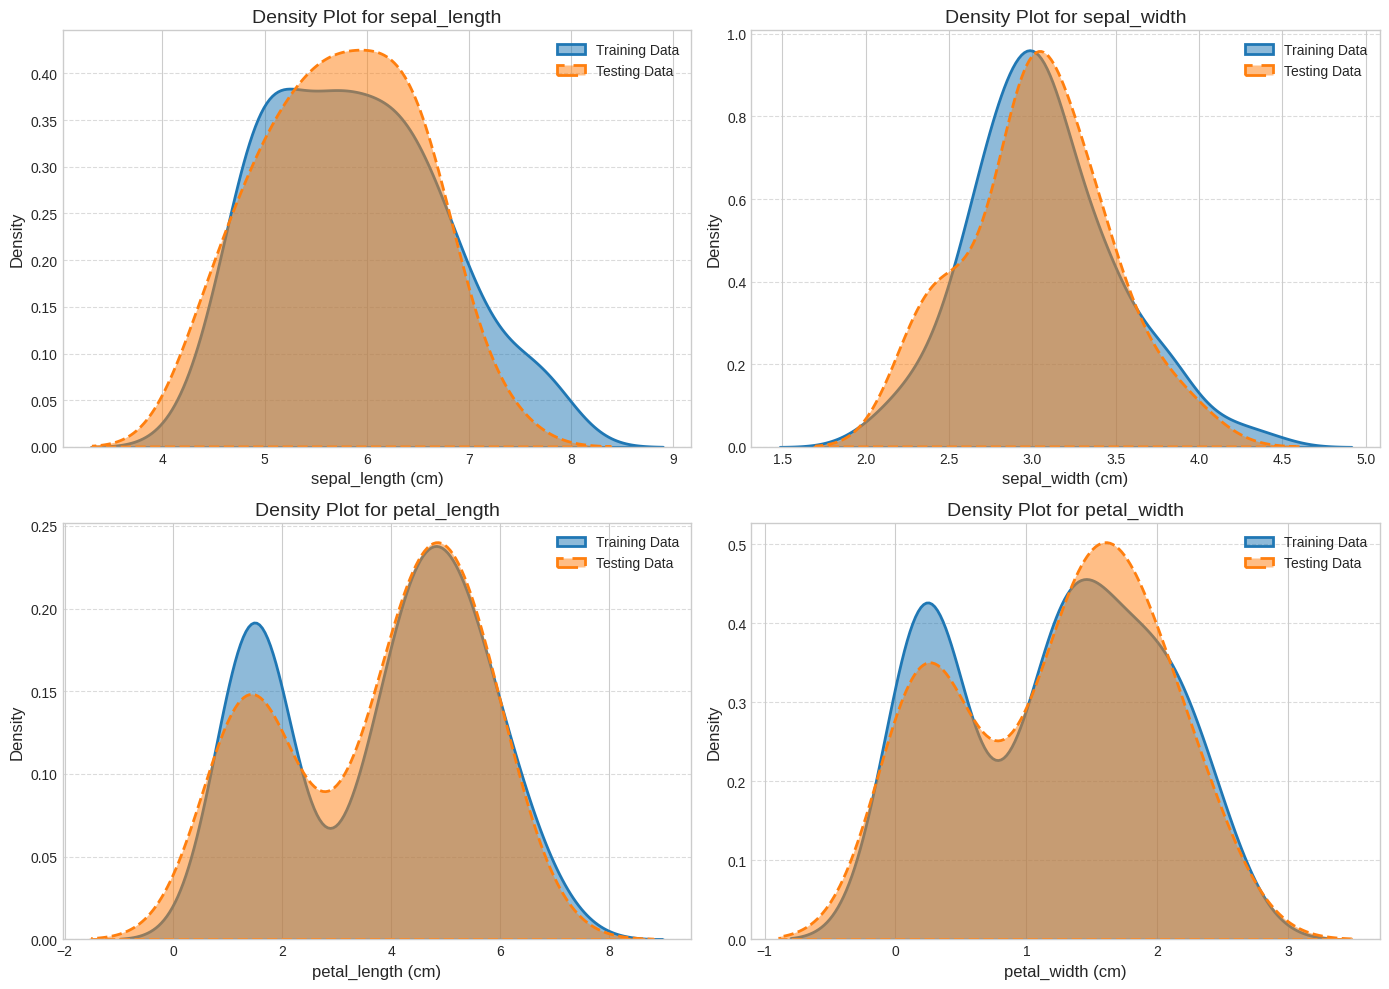

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Required for the dummy data placeholder

# Assume 'combined_df' is available from previous steps.
# It should contain numerical feature columns and a 'Dataset_Type' column
# indicating 'Training' or 'Testing'.
# Assume 'feature_column_names' (list of strings) is also defined.

# --- Placeholder for combined_df and feature_column_names if not available ---
if 'combined_df' not in locals() or not isinstance(combined_df, pd.DataFrame) or combined_df.empty or \
   'feature_column_names' not in locals() or not isinstance(feature_column_names, list) or not feature_column_names:
    print("NOTICE: 'combined_df' or 'feature_column_names' are not available or empty. "
          "Creating dummy data for KDE plot example.")

    # Define dummy feature column names if not already defined globally
    if 'feature_column_names' not in locals() or not feature_column_names :
        feature_column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

    _target_column_name_ph_kde = 'species' # Dummy target, not directly used in this plot but part of combined_df usually
    _num_samples_ph_kde = 150

    # Create dummy features based on the length of feature_column_names
    _dummy_features_kde_data = np.zeros((_num_samples_ph_kde, len(feature_column_names)))
    # Apply some scaling and distribution similar to Iris for dummy data
    if 'sepal_length' in feature_column_names:
        _dummy_features_kde_data[:, feature_column_names.index('sepal_length')] = np.random.normal(5.8, 0.8, _num_samples_ph_kde)
    if 'sepal_width' in feature_column_names:
        _dummy_features_kde_data[:, feature_column_names.index('sepal_width')] = np.random.normal(3.0, 0.4, _num_samples_ph_kde)
    if 'petal_length' in feature_column_names:
        _dummy_features_kde_data[:, feature_column_names.index('petal_length')] = np.random.normal(3.7, 1.7, _num_samples_ph_kde)
    if 'petal_width' in feature_column_names: # Check if index exists
         if feature_column_names.index('petal_width') < _dummy_features_kde_data.shape[1]:
            _dummy_features_kde_data[:, feature_column_names.index('petal_width')] = np.random.normal(1.2, 0.7, _num_samples_ph_kde)

    _dummy_species_list_kde = np.random.choice(['setosa', 'versicolor', 'virginica'], _num_samples_ph_kde)

    combined_df = pd.DataFrame(_dummy_features_kde_data, columns=feature_column_names)
    combined_df[_target_column_name_ph_kde] = _dummy_species_list_kde
    # Create 'Dataset_Type' column for splitting with 'Training' and 'Testing' values
    train_mask = np.random.rand(_num_samples_ph_kde) < 0.75 # Approx 75% for training
    combined_df['Dataset_Type'] = np.where(train_mask, 'Training', 'Testing')

    print(f"Dummy 'combined_df' created with shape: {combined_df.shape}")
    print(f"Using features for KDE plots: {feature_column_names}")
    print(combined_df.head())
    print("Value counts for 'Dataset_Type' in dummy data:")
    print(combined_df['Dataset_Type'].value_counts())
    print("--- End of placeholder section ---")
# --- End of placeholder section ---


if 'combined_df' in locals() and isinstance(combined_df, pd.DataFrame) and not combined_df.empty and \
   'feature_column_names' in locals() and isinstance(feature_column_names, list) and feature_column_names and \
   'Dataset_Type' in combined_df.columns:

    # Determine the number of features to plot
    num_features = len(feature_column_names)

    # Determine grid size for subplots (e.g., 2 columns, rows as needed)
    if num_features == 0:
        print("Error: No feature columns specified to plot.")
    else:
        # Define number of columns for subplot grid
        subplot_cols = 2
        # Calculate number of rows needed for subplot grid
        subplot_rows = (num_features + subplot_cols - 1) // subplot_cols # Ceiling division

        # Create the figure and subplots
        fig, axes = plt.subplots(subplot_rows, subplot_cols, figsize=(subplot_cols * 7, subplot_rows * 5))
        # Flatten axes array for easy iteration, especially if subplot_rows or subplot_cols is 1
        axes = axes.flatten()

        print(f"\nGenerating Kernel Density Estimate (KDE) plots for {num_features} features, "
              "separated by Training/Testing sets...")

        for i, feature_name in enumerate(feature_column_names):
            # Check if the feature exists in the DataFrame and is numerical
            if feature_name not in combined_df.columns:
                print(f"Warning: Feature '{feature_name}' not found in combined_df. Skipping this plot.")
                if i < len(axes): axes[i].set_visible(False) # Hide unused subplot if feature is missing
                continue
            if not pd.api.types.is_numeric_dtype(combined_df[feature_name]):
                print(f"Warning: Feature '{feature_name}' is not numerical. Skipping KDE plot for this feature.")
                if i < len(axes): axes[i].set_visible(False) # Hide unused subplot
                continue

            current_ax = axes[i] # Select the current subplot

            # Plot KDE for Training data for the current feature
            sns.kdeplot(data=combined_df[combined_df['Dataset_Type'] == 'Training'],
                        x=feature_name,
                        ax=current_ax,
                        label='Training Data',
                        fill=True,      # Fill the area under the curve
                        alpha=0.5,      # Set transparency for the fill
                        linewidth=2)

            # Plot KDE for Testing data for the current feature on the same subplot
            sns.kdeplot(data=combined_df[combined_df['Dataset_Type'] == 'Testing'],
                        x=feature_name,
                        ax=current_ax,
                        label='Testing Data',
                        fill=True,      # Fill the area under the curve
                        alpha=0.5,      # Set transparency for the fill
                        linewidth=2,
                        linestyle='--') # Use a different linestyle for the testing set KDE

            current_ax.set_title(f'Density Plot for {feature_name}', fontsize=14)
            current_ax.set_xlabel(feature_name + " (cm)", fontsize=12) # Assuming units are cm for Iris
            current_ax.set_ylabel('Density', fontsize=12)
            current_ax.legend()
            current_ax.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines

        # Hide any unused subplots if num_features is not a multiple of subplot_cols (e.g., 3 features on a 2x2 grid)
        for j in range(num_features, len(axes)):
            axes[j].set_visible(False)

        plt.tight_layout() # Adjust subplot parameters for a tight layout
        plt.show()
else:
    print("\n'combined_df' is not available/empty, or 'feature_column_names'/'Dataset_Type' column are not properly defined.")
    print("Please ensure 'combined_df' contains numerical feature columns and the 'Dataset_Type' column ('Training'/'Testing').")

#**_3-2-3-1**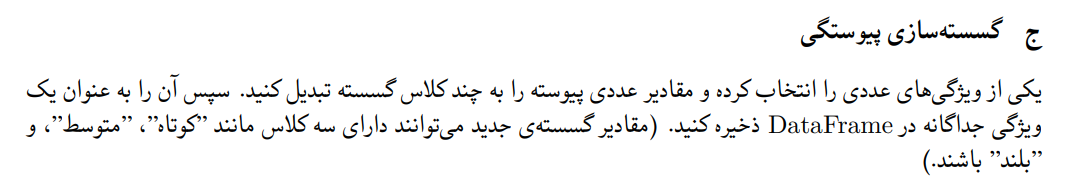

In [ ]:
import pandas as pd
import numpy as np # Required for the dummy data placeholder

# Assume 'combined_df' is available from previous steps,
# and 'feature_column_names' (list of strings for feature columns) is also defined.

# --- Placeholder for combined_df and feature_column_names if not available ---
if 'combined_df' not in locals() or not isinstance(combined_df, pd.DataFrame) or combined_df.empty:
    print("NOTICE: 'combined_df' is not available or empty. "
          "Creating dummy data for discretization example.")

    # Define dummy feature column names if not already defined globally
    if 'feature_column_names' not in locals() or not isinstance(feature_column_names, list) or not feature_column_names:
        feature_column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

    _target_column_name_ph_disc = 'species'
    _num_samples_ph_disc = 150

    # Create dummy features based on the length of feature_column_names
    _dummy_features_disc_data = np.zeros((_num_samples_ph_disc, len(feature_column_names)))
    if 'sepal_length' in feature_column_names:
        _dummy_features_disc_data[:, feature_column_names.index('sepal_length')] = np.random.normal(5.8, 0.8, _num_samples_ph_disc)
    if 'sepal_width' in feature_column_names:
        _dummy_features_disc_data[:, feature_column_names.index('sepal_width')] = np.random.normal(3.0, 0.4, _num_samples_ph_disc)
    # For petal_length, ensure a good range for discretization in dummy data
    if 'petal_length' in feature_column_names:
        _dummy_features_disc_data[:, feature_column_names.index('petal_length')] = np.random.uniform(1.0, 6.9, _num_samples_ph_disc)
    if 'petal_width' in feature_column_names: # Check if index exists
         if feature_column_names.index('petal_width') < _dummy_features_disc_data.shape[1]:
            _dummy_features_disc_data[:, feature_column_names.index('petal_width')] = np.random.normal(1.2, 0.7, _num_samples_ph_disc)

    _dummy_species_list_disc = np.random.choice(['setosa', 'versicolor', 'virginica'], _num_samples_ph_disc)

    combined_df = pd.DataFrame(_dummy_features_disc_data, columns=feature_column_names)
    combined_df[_target_column_name_ph_disc] = _dummy_species_list_disc
    combined_df['Dataset_Type'] = np.random.choice(['Training', 'Testing'], _num_samples_ph_disc) # For placeholder completeness

    print(f"Dummy 'combined_df' created with shape: {combined_df.shape}")
    print(f"Using features from feature_column_names: {feature_column_names}")
    print(combined_df.head())
    print("--- End of placeholder section ---")
# --- End of placeholder section ---


if 'combined_df' in locals() and isinstance(combined_df, pd.DataFrame) and not combined_df.empty and \
   'feature_column_names' in locals() and isinstance(feature_column_names, list) and feature_column_names:

    # 1. Select a numerical feature to discretize.
    # We'll prioritize 'petal_length'. If not available or not numeric,
    # try to find another suitable numeric feature from feature_column_names.
    feature_to_discretize = None
    if 'petal_length' in feature_column_names and 'petal_length' in combined_df.columns and \
       pd.api.types.is_numeric_dtype(combined_df['petal_length']):
        feature_to_discretize = 'petal_length'
    else:
        # Fallback: find the first available numerical feature from the list
        for col_name in feature_column_names:
            if col_name in combined_df.columns and pd.api.types.is_numeric_dtype(combined_df[col_name]):
                feature_to_discretize = col_name
                print(f"Note: '{feature_to_discretize}' was selected as the feature to discretize (as 'petal_length' was not suitable or not available).")
                break

    if not feature_to_discretize:
        print("Error: No suitable numerical feature found to discretize from the provided feature_column_names.")
    else:
        print(f"\nSelected feature for discretization: '{feature_to_discretize}'")

        # 2. Define the number of bins and the labels for these bins.
        # The user requested three classes with Persian labels.
        num_bins = 3
        bin_labels_persian = ["کوتاه", "متوسط", "بلند"] # Persian labels for the discrete classes

        # 3. Discretize the selected feature using pd.qcut.
        # pd.qcut attempts to divide the data into bins with an equal number of observations.
        # The name for the new column containing the discretized feature.
        discretized_feature_col_name = f'{feature_to_discretize}_discrete_fa' # Suffix '_fa' for Persian labels

        try:
            # Perform quantile-based discretization
            combined_df[discretized_feature_col_name] = pd.qcut(combined_df[feature_to_discretize],
                                                                q=num_bins,
                                                                labels=bin_labels_persian,
                                                                duplicates='drop') # Handles issues with non-unique bin edges

            # 4. Display information about the new discretized feature.
            print(f"\nSuccessfully discretized the feature '{feature_to_discretize}' into a new column '{discretized_feature_col_name}'.")

            print("\nValue counts for the new discrete feature (تعداد نمونه در هر کلاس گسسته):")
            # Display value counts, including NaNs if any occurred during binning
            print(combined_df[discretized_feature_col_name].value_counts(dropna=False))

            print(f"\nDataFrame head showing the original feature ('{feature_to_discretize}') and its new discrete version ('{discretized_feature_col_name}'):")
            # Select relevant columns to show for comparison
            columns_to_display = [feature_to_discretize, discretized_feature_col_name]
            # Add a few other columns from the original DataFrame for context, if they exist
            other_cols = [col for col in combined_df.columns if col not in columns_to_display]
            if len(other_cols) > 0:
                columns_to_display.append(other_cols[0]) # Add one more column for context

            print(combined_df[columns_to_display].head(10))

        except ValueError as e:
            print(f"\nError during discretization of '{feature_to_discretize}': {e}")
            print("This can occur if the data distribution does not allow for quantile-based binning "
                  "(e.g., too many identical values, not enough distinct values to form quantiles).")
            print("You might consider using pd.cut for equal-width binning or adjusting the number of bins.")
        except Exception as e_general: # Catch any other unexpected error
            print(f"\nAn unexpected error occurred during discretization: {e_general}")

else:
    print("\n'combined_df' is not available/empty or 'feature_column_names' are not properly defined. "
          "Cannot perform discretization.")
    print("Please ensure 'combined_df' contains numerical feature columns and 'feature_column_names' list is correctly set up.")


Selected feature for discretization: 'petal_length'

Successfully discretized the feature 'petal_length' into a new column 'petal_length_discrete_fa'.

Value counts for the new discrete feature (تعداد نمونه در هر کلاس گسسته):
petal_length_discrete_fa
متوسط    54
کوتاه    50
بلند     46
Name: count, dtype: int64

DataFrame head showing the original feature ('petal_length') and its new discrete version ('petal_length_discrete_fa'):
     petal_length petal_length_discrete_fa  sepal_length
130           6.1                     بلند           7.4
122           6.7                     بلند           7.7
81            3.7                    متوسط           5.5
71            4.0                    متوسط           6.1
89            4.0                    متوسط           5.5
100           6.0                     بلند           6.3
6             1.4                    کوتاه           4.6
123           4.9                    متوسط           6.3
30            1.6                    کوتاه          

#**_3-2-4-1**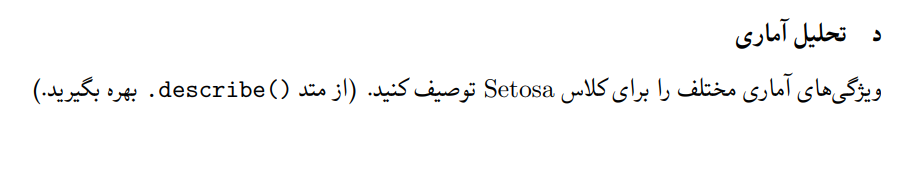

In [ ]:
import pandas as pd
import numpy as np # Required for the dummy data placeholder

# Assume 'combined_df' is available from previous steps.
# It should contain numerical feature columns and a target column (e.g., 'species')
# indicating the Iris species.
# Assume 'feature_column_names' (list of strings) and 'target_column_name' (string) are also defined.

# --- Placeholder for combined_df, feature_column_names, and target_column_name if not available ---
if 'combined_df' not in locals() or not isinstance(combined_df, pd.DataFrame) or combined_df.empty or \
   'feature_column_names' not in locals() or not isinstance(feature_column_names, list) or not feature_column_names or \
   'target_column_name' not in locals() or not isinstance(target_column_name, str) or not target_column_name:

    print("NOTICE: 'combined_df', 'feature_column_names', or 'target_column_name' are not available or are empty/invalid. "
          "Creating dummy data for describe() example.")

    # Define dummy feature column names if not already defined globally
    if 'feature_column_names' not in locals() or not feature_column_names:
        feature_column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    # Define dummy target column name if not already defined globally
    if 'target_column_name' not in locals() or not target_column_name:
        target_column_name = 'species'

    _num_samples_ph_desc = 150
    _setosa_count_ph = 50 # Number of Setosa samples in dummy data

    _dummy_features_desc_data = np.zeros((_num_samples_ph_desc, len(feature_column_names)))

    # Simulate Setosa characteristics for a portion of dummy data
    # Ensure feature_column_names indices exist before accessing
    if 'petal_length' in feature_column_names:
        _dummy_features_desc_data[:_setosa_count_ph, feature_column_names.index('petal_length')] = np.random.normal(1.46, 0.17, _setosa_count_ph)
    if 'petal_width' in feature_column_names:
        _dummy_features_desc_data[:_setosa_count_ph, feature_column_names.index('petal_width')] = np.random.normal(0.24, 0.10, _setosa_count_ph)
    if 'sepal_length' in feature_column_names:
        _dummy_features_desc_data[:_setosa_count_ph, feature_column_names.index('sepal_length')] = np.random.normal(5.0, 0.35, _setosa_count_ph)
    if 'sepal_width' in feature_column_names:
        _dummy_features_desc_data[:_setosa_count_ph, feature_column_names.index('sepal_width')] = np.random.normal(3.4, 0.38, _setosa_count_ph)

    # Fill rest with other species data (less specific for this example, just random)
    for i in range(len(feature_column_names)): # Ensure all feature columns get some data
        _dummy_features_desc_data[_setosa_count_ph:, i] = np.random.rand(_num_samples_ph_desc - _setosa_count_ph) * 5 + 1


    _dummy_species_list_desc = ['setosa'] * _setosa_count_ph + \
                               np.random.choice(['versicolor', 'virginica'], _num_samples_ph_desc - _setosa_count_ph).tolist()

    combined_df = pd.DataFrame(_dummy_features_desc_data, columns=feature_column_names)
    combined_df[target_column_name] = _dummy_species_list_desc

    print(f"Dummy 'combined_df' created with shape: {combined_df.shape}")
    print(f"Using features: {feature_column_names}, and target: {target_column_name}")
    # print(combined_df.head()) # Optional: print head of dummy data
    print(f"Value counts for '{target_column_name}' in dummy data:")
    print(combined_df[target_column_name].value_counts())
    print("--- End of placeholder section ---")
# --- End of placeholder section ---


if 'combined_df' in locals() and isinstance(combined_df, pd.DataFrame) and not combined_df.empty and \
   'feature_column_names' in locals() and isinstance(feature_column_names, list) and feature_column_names and \
   'target_column_name' in locals() and isinstance(target_column_name, str) and target_column_name in combined_df.columns:

    # 1. Define the class to filter by (as requested by the user)
    target_class_to_describe = 'setosa' # Case-sensitive, ensure it matches the values in your target column

    # Check if the target class actually exists in the target column of the DataFrame
    if target_class_to_describe not in combined_df[target_column_name].unique():
        print(f"Error: Class '{target_class_to_describe}' not found in the target column '{target_column_name}'.")
        print(f"Available classes are: {combined_df[target_column_name].unique()}")
    else:
        # 2. Filter the DataFrame to get only rows belonging to the 'setosa' class
        setosa_data_df = combined_df[combined_df[target_column_name] == target_class_to_describe]

        if setosa_data_df.empty:
            print(f"No data found for class '{target_class_to_describe}'. Cannot describe features.")
        else:
            # 3. Select only the numerical feature columns from this filtered DataFrame
            # This ensures .describe() is applied only to relevant columns.
            numerical_features_for_setosa = []
            for col_name in feature_column_names:
                if col_name in setosa_data_df.columns: # Check if column exists in the filtered df
                    if pd.api.types.is_numeric_dtype(setosa_data_df[col_name]):
                        numerical_features_for_setosa.append(col_name)
                    else:
                        # This message is useful if a listed feature column is not numeric
                        print(f"Warning: Feature column '{col_name}' is not numerical for class '{target_class_to_describe}' and will be excluded from describe().")
                else:
                     # This message is useful if a listed feature column is not in combined_df at all
                     print(f"Warning: Feature column '{col_name}' (from feature_column_names) not found in the data filtered for '{target_class_to_describe}'.")


            if not numerical_features_for_setosa:
                print(f"Error: No numerical features found to describe for class '{target_class_to_describe}' based on feature_column_names.")
            else:
                setosa_features_to_describe_df = setosa_data_df[numerical_features_for_setosa]

                # 4. Apply the .describe() method to the selected features of the 'Setosa' data
                print(f"\nDescriptive statistics for features of Iris '{target_class_to_describe}' class:")
                description_of_setosa = setosa_features_to_describe_df.describe()

                # 5. Print the resulting descriptive statistics
                print(description_of_setosa)
else:
    print("\n'combined_df' is not available/empty, or 'feature_column_names'/'target_column_name' are not properly defined.")
    print("Please ensure 'combined_df' contains the feature and target columns, and the necessary variable names are correctly set up.")


Descriptive statistics for features of Iris 'setosa' class:
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000
